<center>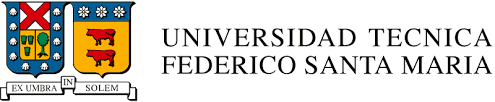</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Árboles y Bosques de Regresión
* Máquinas de ensamblado
* Redes Neuronales


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 30 de Junio, en horario de clases.
* Fecha de entrega: 01 de Julio. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

<hr style="height:2px;border:none"/>

Estudiantes a cargo del presente informe con sus respectivos roles USM:

- **Diego Astaburuaga: 202010018-7**

- **David Rivas: 202010014-4**

- **Dominique Yessouroun: 201910005-k**

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score, accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor # Regresores lineales
import warnings # ignore warnings

import os


# 1. Predicción de la calidad de vinos

Los árboles de regresión, también conocidos como árboles de decisión para regresión, son un tipo de algoritmo de aprendizaje supervisado que se utiliza para predecir valores numéricos. Son una potente herramienta para tareas de regresión y ofrecen varias ventajas y consideraciones.

<center><img src=https://cdn.shopify.com/s/files/1/1277/3667/files/an-essential-guide-1_480x480.png?v=1674719515></center>


Los conjuntos de datos provienen del UCI Machine Learning Repository. Estos conjuntos de datos están relacionados con las variantes tintas y blancas del vino portugués "Vinho Verde".

Estos dos conjuntos de datos contienen varias propiedades químicas de distintos vinos, como la acidez, el pH, el contenido de alcohol, etc. La variable objetivo es la calidad del vino la cual se puntúa del 0 al 10. Puede considerarse una tarea de clasificación o regresión en la que las clases están ordenadas y no balanceadas. Para esta pregunta nos centraremos en la tarea de regresión.

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* tipo

Variable objetivo (basadas en datos sensoriales):
* quality



Para obtener más información sobre este conjunto de datos, revise el siguiente link: https://www.kaggle.com/datasets/rajyellow46/wine-quality.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Aplique lo aprendido en la tarea 1 y obtenga los datos de la forma que le sea más conveniente siempre y cuando estos sean los del link de la descripción.

In [66]:
df = pd.read_csv('winequalityN.csv')

In [67]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :", df.shape,"\n") 

df.head()

Total Rows and Columns in DataFrame is : (6497, 13) 



,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 1.1.1 Exploración del conjunto de datos

Explore el conjunto de datos y responda brevemente las siguientes preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> b) ¿Existen datos faltantes, si es así en qué atributos faltan datos y cuantos faltan?

> c) ¿Qué técnicas conoce para rellenar los datos faltantes de los atributos del dataset? (si no conoce ninguna investigue al menos 2)




In [68]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

info = datainfo(df)

In [69]:
numericas_int = list(info[info['DataType'] == 'int64'].index)
numericas_float = list(info[info['DataType'] == 'float64'].index)

print('a) Respuesta:\n Numeric variables:')
total_int = 1
for i,variable in enumerate(numericas_int):
    print(f'   {i+1}. (int) {variable}')
    total = i + 1
for i,variable in enumerate(numericas_float):
    print(f'   {total+i+1}. (float) {variable}')
print('\n')

# Selecting the categoric variables
categoricas = list(info[info['DataType'] == 'object'].index) 
print(' Categoric variables:')
for i,variable in enumerate(categoricas):
    print(f'   {i+1}. {variable}')

a) Respuesta:
 Numeric variables:
   1. (int) quality
   2. (float) fixed acidity
   3. (float) volatile acidity
   4. (float) citric acid
   5. (float) residual sugar
   6. (float) chlorides
   7. (float) free sulfur dioxide
   8. (float) total sulfur dioxide
   9. (float) density
   10. (float) pH
   11. (float) sulphates
   12. (float) alcohol


 Categoric variables:
   1. type


a) `Respuesta`: Se encuentra en el resultado anterior.

b) `Respuesta`: Si existen datos faltantes, se muestran a continuación en formato 'atributo' 'cantidad faltante' mediante el código.

In [70]:
data_NaN = info[(info['NaN_Values'] > 0)]['NaN_Values'] 
data_NaN

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
Name: NaN_Values, dtype: int64

c) `Respuesta`:

- Imputación por la media: Como todas las columnas con datos faltantes son de carácter numérico, una opción es calcular la media de los valores de cada columna que si están presentes en el data set y utilizar dicho valor para reemplazar aquellos que falten.

- Imputación por regresión: Como nuevamente los datos son numéricos, para cada columna con datos faltantes, otra opción puede ser utilizar otra columna que no posea dicho datos faltantes (junto con otros criterios de interés) y ajustar un modelo de regresión con los datos que si están presentes y utilizarlo para predecir los valores que no estén.

- En caso de que las variables no sean numéricas, es decir, valores categóricos, la imputación por la media se reemplaza por imputación por la moda, mientras que imputación por regresión se reemplaza por imputación por clasificación, donde se procede de igual manera pero esta vez con un modelo de clasificación.

### 1.1.2 Exploración de Features

En problemas de regresión, el desbalance de la variable objetivo se refiere a una distribución desigual de los valores de la variable objetivo en el conjunto de datos. Esto significa que hay una presencia significativa de valores en una clase o rango de valores en comparación con otras clases o rangos de valores. Considerando lo anterior responda las siguientes preguntas:

> a) Grafique histogramas y box plots de cada variable y comente acerca de la distribución de las características y de la variable objetivo

> b) ¿Considera que están *balanceados* los valores de la variable objetivo?

> c) ¿Cómo afecta el desbalance en problemas de regresión en términos de la predicción y de la evaluación de un modelo?

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

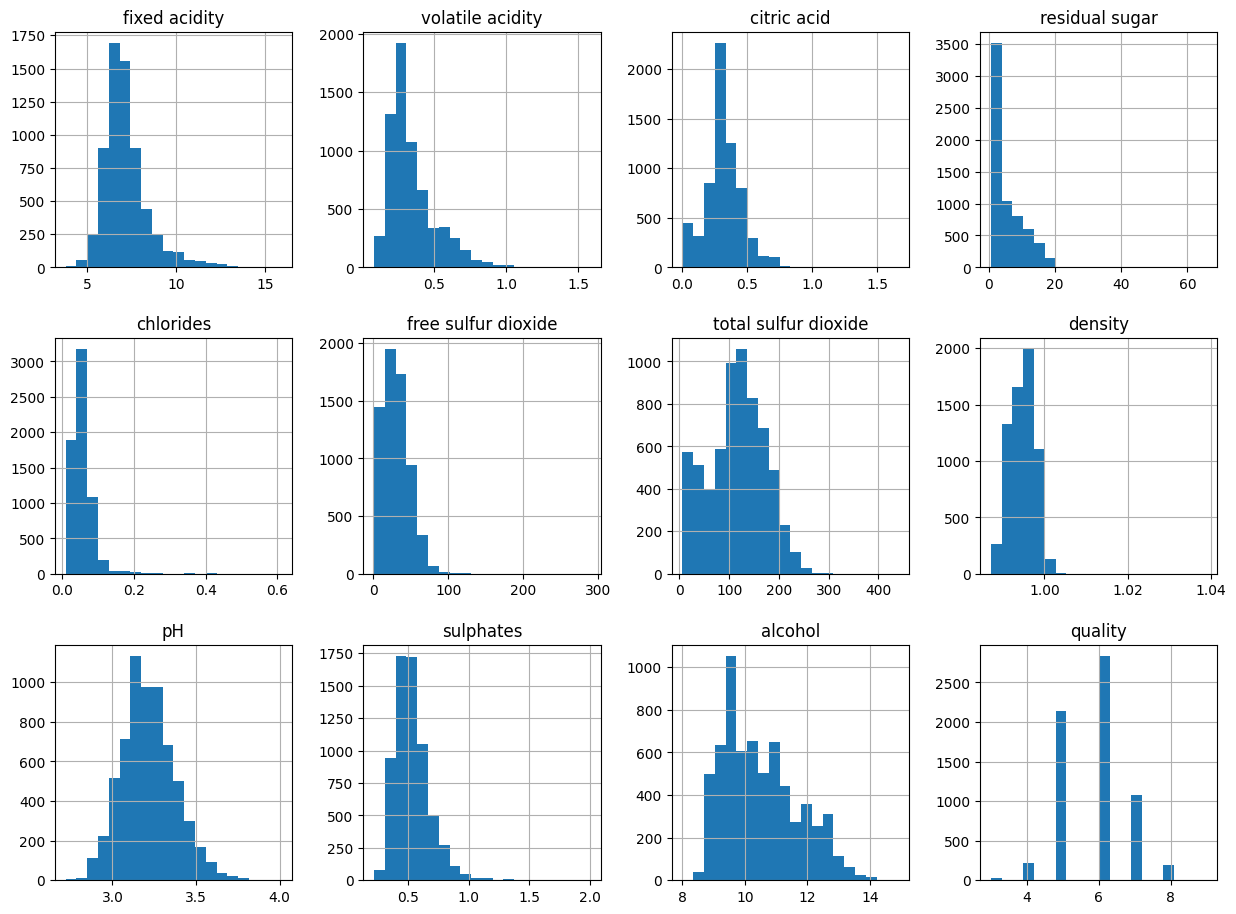

In [71]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

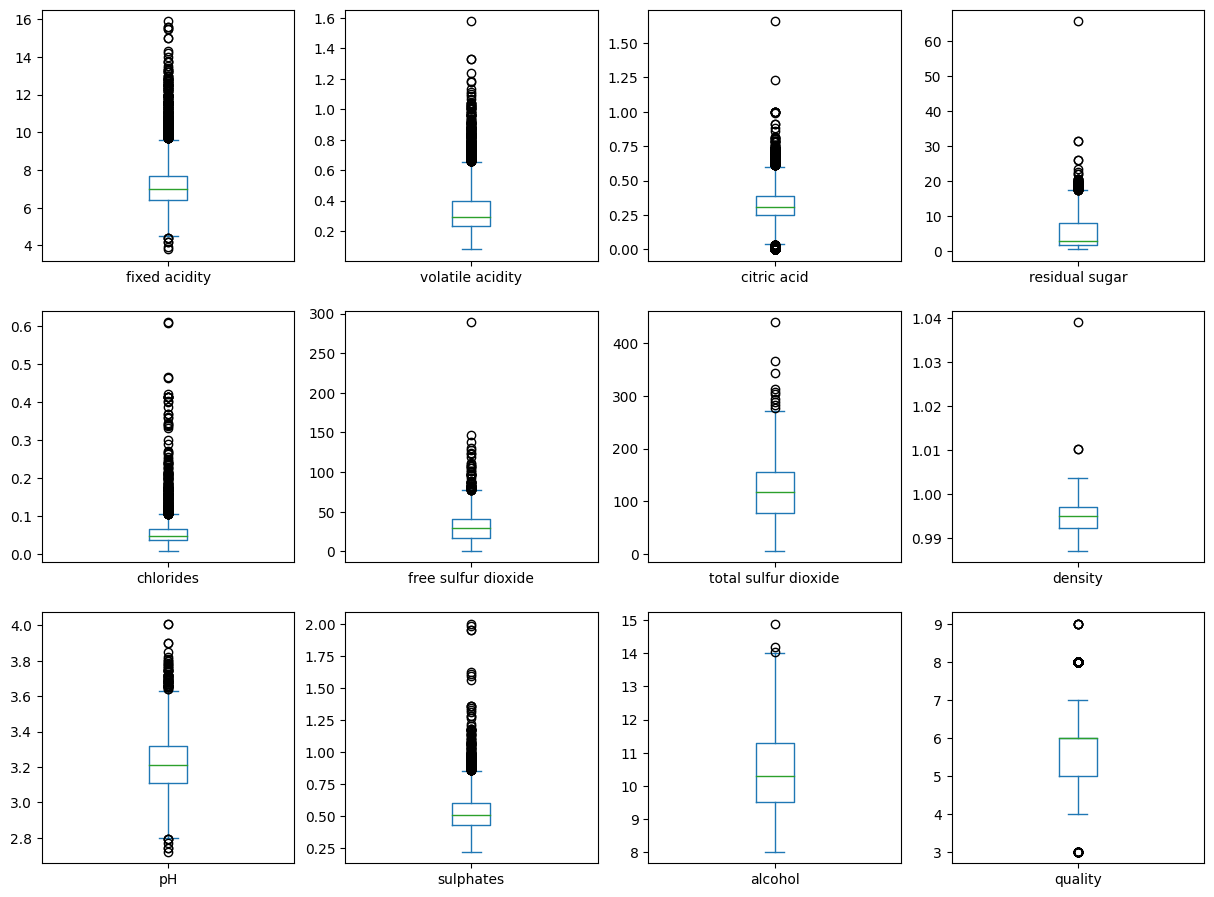

In [72]:
# buscar outliers con boxplots
df.plot(kind="box",subplots=True,layout=(4,4),figsize=(15,15))

a)  `Respuesta`: Con los histogramas y boxplot realizados anteriormente, se comenta el siguiente punteo:

- Sobre la variable objetivo, esta parece tener una distribución normal centrada en el valor $6$ pero cargada hacia valores más bajos, donde además se tiene que el tercer cuartil coincide con la mediana, y que dicha variable es claramente discreta.

- En la mayoria de los features los outliners corresponden a valores muy grande respecto al resto, siendo casos especificos como el "_pH_", "_fixed acidity_" y "_citric acid_" de los pocos features con valores átipicos bajos por debajo del resto.

- En general, se observa que cada feature posee una distribución cercana a la normal centrada al rededor de algún valor, donde sólo "_total_sulfur_dioxide_" pareciera tener dos "puntos de concentración". También se nota que tanto "_residual sugar_", "_chlorides_" como "_free sulfur dioxide_" son lás categorías más particulares y diferentes a una distribución normal, aún que es razonable seguir considerando que distribuyen normal con una media muy cercana a 0.

In [73]:
# Obtener los valores únicos de quality
valores_unicos = df['quality'].unique()
print(valores_unicos)

[6 5 7 8 4 3 9]


In [74]:
aux = df[(df['quality'] == 6)].shape[0]/df.shape[0]
print(f'Porcentaje de quality == 6: {round(aux*100,2)}%')

Porcentaje de quality == 6: 43.65%


b) `Respuesta`: Se considera que los valores de la variable objetivo están desbalanceados, basta notar que hay una clara representación de los valores iguales a 6 (43.6%) mientras que los otros 9 valores posibles, comparten el otro 56.35%.

c) `Respuesta`: El desbalance en problemas de regresión en términos de la predicción y evaluación del modelo se ve en distintas aristas:

1. Sesgo en la predicción: Si los datos están desbalanceados, es decir, si hay una gran diferencia en la distribución de los valores de la variable objetivo, el modelo puede estar sesgado hacia los valores más frecuentes. Esto significa que el modelo puede tener dificultades para predecir con precisión los valores menos comunes o subrepresentados.

2. Precisión y error: Relacionado con lo anterior, el modelo al tener un desempeño sesgado a favor de las clases mayoritarias puede provocar un alto desempeño en la clasificación de dichas clases pero un desempeño peor en las clases que sean menos representadas o en valores menos frecuentes, siendo un modelo poco fiable para estos casos.

3. Evaluación engañosa: Consecuencia del desbalance, métricas como la evaluación se vuelven engañosas ya que entregarían altos valores al medir que el modelo predice correctamente la clase mayoritaria, y en consecuencia buena parte de los datos, lo cual no refleja realmente la calidad del modelo por lo cual puede ser engañosa, por ende en estos casos se requiere utilizar métricas adicionales como la sensibilidad, la especificidad o el área bajo la curva ROC (AUC - ROC), que proporcionan una imagen más completa del rendimiento del modelo en casos desbalanceados.

<Axes: >

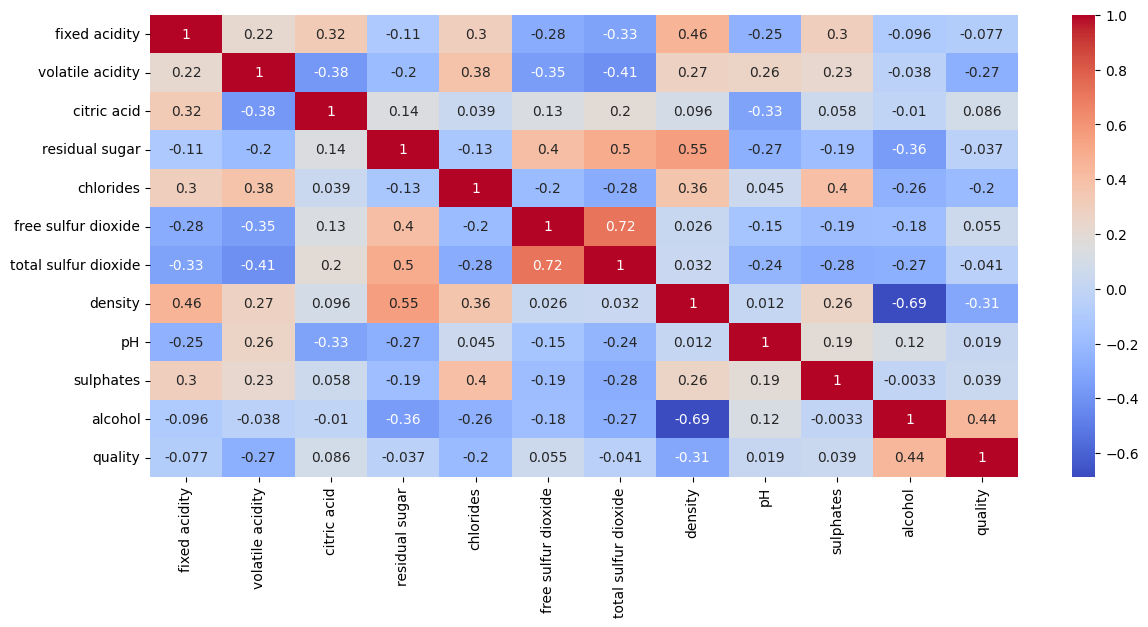

In [75]:
plt.figure(figsize=[14,6])
sns.heatmap(df.loc[:, ~df.columns.isin(['type'])].corr(), annot = True, cmap = 'coolwarm')

Note que _'free sulfur dioxide'_ y _'total sulfur dioxide'_ poseen alta correlación, pero la correlación entre nuestro target y _'free sulfur dioxide'_ es mayor, por lo que para evitar problemas de colinealidad, eliminaremos la variable _'total sulfur dioxide'_. Mediante un análisis análogo, también eliminaremos la variable _'density'_.

In [76]:
df = df.drop(['total sulfur dioxide', 'density'], axis=1)

In [77]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6


In [78]:
df = pd.get_dummies(df,drop_first=True)

In [79]:
# Convertir los valores booleanos en enteros
df['type_white'] = df['type_white'].astype(int)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,3.52,NaN,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,3.57,0.71,10.2,5,0


### 1.1.3 Separación de conjuntos

> a) Separe el conjunto entre variables características y variable objetivo.

> b) Separe el conjunto de datos en un conjunto de entrenamiento y conjunto de prueba, utilizando una proporción 80%-20% respectivamente.

> c) Una vez separado los conjuntos, obtenga la media de cada variable con datos faltantes en el conjunto de **entrenamiento** y reemplace los valores faltantes (NaN) de ambos conjuntos (entrenamiento y prueba) con dicha media.

a) `Respuesta`: En el siguiente código.

In [80]:
# a)
X = df.drop(['quality'], axis =1)
y = df['quality']

b) `Respuesta`: En el siguiente código.

In [81]:
# b)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

# Shape of the data.
print("Total Rows and Columns in X_train is :", X_train.shape) 
print("Total Rows and Columns in y_train is :", y_train.shape) 
print("Total Rows and Columns in X_test is :", X_test.shape) 
print("Total Rows and Columns in y_test is :", y_test.shape) 

Total Rows and Columns in X_train is : (5197, 10)
Total Rows and Columns in y_train is : (5197,)
Total Rows and Columns in X_test is : (1300, 10)
Total Rows and Columns in y_test is : (1300,)


c) `Respuesta`: Se procede a hacer imputación por media para los datos faltantes.

In [82]:
# c)
# Pick every feature with NaN_Values
for feature in info[info["NaN_Values"]>0].T:

    media = X_train[feature].mean(skipna = True)
    X_train[feature] = X_train[feature].fillna(media)
    X_test[feature] = X_test[feature].fillna(media)
    
    print(f'{feature}: {media}')

fixed acidity: 7.2148718936621075
volatile acidity: 0.33864862261606626
citric acid: 0.3187389295340778
residual sugar: 5.47135707410972
chlorides: 0.05605908391070054
pH: 3.2172730776642897
sulphates: 0.5294821944177093


In [83]:
info_train = datainfo(pd.concat([X_train, X_test]))
# Ahora
info_train

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
fixed acidity,float64,6497,107,0,0.0
volatile acidity,float64,6497,188,0,0.0
citric acid,float64,6497,90,0,0.0
residual sugar,float64,6497,317,0,0.0
chlorides,float64,6497,215,0,0.0
free sulfur dioxide,float64,6497,135,0,0.0
pH,float64,6497,109,0,0.0
sulphates,float64,6497,112,0,0.0
alcohol,float64,6497,111,0,0.0
type_white,int32,6497,2,0,0.0


In [84]:
# Antes
info

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
type,object,6497,2,0,0.000000
fixed acidity,float64,6487,106,10,0.153917
volatile acidity,float64,6489,187,8,0.123134
citric acid,float64,6494,89,3,0.046175
residual sugar,float64,6495,316,2,0.030783
chlorides,float64,6495,214,2,0.030783
free sulfur dioxide,float64,6497,135,0,0.000000
total sulfur dioxide,float64,6497,276,0,0.000000
density,float64,6497,998,0,0.000000
pH,float64,6488,108,9,0.138525


> d) Estandarice las variables categóricas numéricas no binarias, es decir, todas excepto el tipo de vino y la variable objetivo.

In [85]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,type_white
5413,8.5,0.655,0.49,6.10,0.122,34.0,3.31,1.14,9.3,0
3448,6.7,0.470,0.29,4.75,0.034,29.0,3.29,0.46,13.0,1
2964,5.8,0.190,0.24,1.30,0.044,38.0,3.77,0.60,10.6,1
3009,6.5,0.200,0.50,18.10,0.054,50.0,2.94,0.64,8.8,1
5950,5.6,0.605,0.05,2.40,0.073,19.0,3.56,0.55,12.9,0


d) `Respuesta`: Se procede a estandarizar siguiendo procedimientos ya establecidos.

In [86]:
# d)
X_scaler = preprocessing.StandardScaler()

variables = list(info_train[info_train['DataType'] == 'float64'].index)

cols_to_normalize = variables

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

In [87]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,type_white
5413,0.998332,1.927292,1.171249,0.133342,1.843612,0.185945,0.581335,4.107134,-0.999457,0
3448,-0.399970,0.800226,-0.196545,-0.153008,-0.616740,-0.098637,0.455949,-0.467427,2.097928,1
2964,-1.099122,-0.905605,-0.538493,-0.884793,-0.337154,0.413610,3.465224,0.474394,0.088813,1
3009,-0.555337,-0.844682,1.239639,2.678680,-0.057569,1.096607,-1.738315,0.743486,-1.418023,1
5950,-1.254488,1.622680,-1.837898,-0.651470,0.473643,-0.667801,2.148666,0.138029,2.014215,0


> e) Grafique la relevancia de cada variable con respecto a la variable objetivo utilizando la información mutua entre ambas, en otras palabras: MutualInformation($x_i,y$) siendo $x_i$ la $i$-ésima variable.

e) `Respuesta`: Se desarrolla en los siguientes códigos.

In [88]:
# Calcular la puntuación de importancia mutua

np.random.seed(42)  # Establecer una semilla aleatoria, si esto no se utiliza, el valor de mi varía de acuerdo al muestreo que tome la función para calcularla.

mi = mutual_info_classif(X_train, y_train)
print(mi)

# Imprimir las puntuaciones de importancia mutua para cada característica
df_mi = pd.DataFrame({'feature': X_train.columns, 'score': mi}).sort_values(by='score', ascending=False)
df_mi

[0.02914722 0.07716327 0.03664065 0.06203365 0.05671476 0.04094761
 0.00630762 0.02025225 0.15271092 0.02241611]


,feature,score
8,alcohol,0.152711
1,volatile acidity,0.077163
3,residual sugar,0.062034
4,chlorides,0.056715
5,free sulfur dioxide,0.040948
2,citric acid,0.036641
0,fixed acidity,0.029147
9,type_white,0.022416
7,sulphates,0.020252
6,pH,0.006308


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'pH'),
  Text(7, 0, 'sulphates'),
  Text(8, 0, 'alcohol'),
  Text(9, 0, 'type_white')])

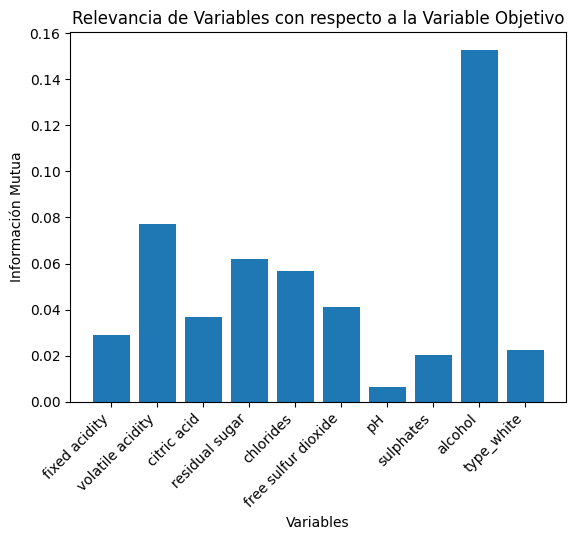

In [89]:
variables = X_train.columns.tolist()

plt.bar(variables, mi)
plt.xlabel('Variables')
plt.ylabel('Información Mutua')
plt.title('Relevancia de Variables con respecto a la Variable Objetivo')
plt.xticks(rotation=45, ha='right')

> f) Cree un segundo conjunto quitando las características que menos aportan información según lo observado en su gráfico de la pregunta anterior. El número de características a quitar es algo que usted deberá escoger y argumentar por qué lo escogió. En adelante al conjunto con todas las variables lo llamaremos conjunto $\textit{A}$ y al nuevo conjunto creado con las características quitadas lo llamaremos conjunto $\textit{B}$.

In [90]:
df_mi

,feature,score
8,alcohol,0.152711
1,volatile acidity,0.077163
3,residual sugar,0.062034
4,chlorides,0.056715
5,free sulfur dioxide,0.040948
2,citric acid,0.036641
0,fixed acidity,0.029147
9,type_white,0.022416
7,sulphates,0.020252
6,pH,0.006308


In [91]:
df_mi.describe()

,score
count,10.000000
mean,0.050433
std,0.041800
min,0.006308
25%,0.024099
50%,0.038794
75%,0.060704
max,0.152711


f) `Respuesta`: Consideraremos todas aquellas características que estén sobre el promedio menos 0.5 veces la desviación estándar (al querer incluir la cola superior de la distribución)

In [92]:
A = [X_train, X_test]

columns = df_mi[df_mi['score']> df_mi['score'].mean() - 0.5* df_mi['score'].std()].iloc[:,0].tolist()
print(columns)
B = [X_train[columns], X_test[columns]]

['alcohol', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'citric acid']


## 1.2 Modelos de Regresión

Para las siguientes preguntas usted debera entrenar, validar y evaluar los modelos utilizando los conjuntos $A$ y $B$ por separado, para luego hacer las respectivas comparaciones entre ambos. Cada modelo tiene sus propios hiperparámetros que usted deberá ajustar a través de una búsqueda en grilla, obteniendo así un conjunto de modelos distintos para posteriormente comparar las métricas de evaluación sobre el conjunto de prueba. Usted estará explorando un subconjunto del espacio de hipótesis variando los hiperparámetros que se le indiquen en cada modelo usando el módulo gridsearchcv de la librería sklearn. En el módulo gridsearchcv fije los parámetros de la forma: 

In [93]:
#GridSearchCV(estimator, param_grid, scoring=mean_squared_error, refit=True)

Siendo estimator el modelo a utilizar, scoring, la métrica para evaluar el modelo y refit=True para una vez probado todo el subconjunto del espacio de hipótesis, escojer el mejor modelo y entrenarlo con todo el conjunto de entrenamiento.

**Nota:** puede utilizar parte del código utilizado en la tarea 1 de esta asignatura.

> Utilizando el modelo de gradiente descendente estocástico (SGD):
> - y_train también se debe estandarizar para el correcto preprocesamiento de datos

In [94]:
y_scaler = preprocessing.StandardScaler()
y_train_sd = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

# Parametros k fold cross valitation
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

# grilla
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'], 
              'alpha': [0.0001, 0.001, 0.01],          
              'learning_rate': ['constant', 'optimal', 'invscaling']} 

best_error = 10000000 #grande grande

reg = SGDRegressor(loss='squared_error', 
                max_iter=300, #epochs
                early_stopping = True, # Default False
                n_iter_no_change=10, # Patience
                tol=0.001, 
                shuffle=True,                                       
                power_t=0.25
                )
hypereg = GridSearchCV(reg, 
            param_grid, 
            scoring='neg_mean_squared_error',               
            refit=True, 
            cv=cv_folds, 
            verbose=0, 
        )

best_rep = 'A'
for set, rep in [(A, 'A'), (B, 'B')]:

    # Entremamos el modelo en la rejilla
    hypereg.fit(B[0], np.asarray(y_train_sd).ravel())

    # Obtenemos el valor predicho
    y_pred = hypereg.predict(B[1]).reshape(-1, 1)

    # Escalamos a la escala original los valores predichos
    y_pred = y_scaler.inverse_transform(y_pred)

    error = mean_squared_error(y_test, y_pred)

    print(f'error conjunto {rep}: {error}')
    if error < best_error:
        best_rep = rep
        best_error = error
    print('----------------------------------')

print(f"{best_rep} tuvo mejor performance en este modelo")

error conjunto A: 0.5759573891572235
----------------------------------
error conjunto B: 0.5727606256741345
----------------------------------
B tuvo mejor performance en este modelo


### 1.2.1 Árbol de regresión

Entrene un árbol de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

> a) max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

a) `Respuesta`: Modificar este hiperparámetro significa determinar una profundidad máxima que puede alcanzar el árbol de regresión. Si se escoge un valor muy bajo, la poca profundidad puede inducir un underfitting al tener poca complejidad el modelo, mientras que un valor alto, puede provocar overfitting.

> b) max_leaf_nodes: Probar con los valores 10, 50, 100. Describa brevemente qué es lo que significa modificar este hiperparámetro.

b) `Respuesta`: Modificar "_max\_leaf\_nodes_" significa establecer un número máximo de hojas que puede tener el árbol. Nuevamente valores altos provocan riesgo de overfitting mientras que los valores bajos tienen riesgo de underfitting. \textbf{REVISAR!}

Responda las siguientes preguntas:

> c) ¿Cuántos modelos de árboles de regresión le quedan en total?

c) `Respuesta`: Considerando todas las posibles combinaciones anteriores, quedan $3x3=9$ modelos de árboles de regresión en total.

> d) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación de la grilla utilizando la métrica de evaluación $mean\_squared\_error$.

d) `Respuesta`: Se responde más adelante en formato de código.

**Nota:** Recuerde que estos experimentos debe realizarlos para ambas representaciones de los conjuntos ($A$ y $B$).



In [95]:
param_grid = {
    'max_depth': [2, 20, 200],
    'max_leaf_nodes': [10, 50, 100]
}

model_1 = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(model_1, param_grid, cv=5, scoring='neg_mean_squared_error')

############# A #############
rep_A = grid_search.fit(X_train, y_train_sd)
best_model_A = rep_A.best_estimator_

best_params = grid_search.best_params_
print('Representación A:')
print("Mejores parámetros:", best_params)

cv_results = rep_A.cv_results_
error_A = -cv_results['mean_test_score']
print(f'Error en cada modelo: {error_A}')

best_score_A = -rep_A.best_score_
print(f'Error del mejor modelo: {best_score_A}')

print('-------------------------------------------------------------')

############# B #############

rep_B = grid_search.fit(B[0], y_train_sd)
best_model_B = rep_B.best_estimator_

best_params = grid_search.best_params_
print('Representación B:')
print("Mejores parámetros:", best_params)

cv_results = rep_B.cv_results_
error_B = -cv_results['mean_test_score']
print(f'Error en cada modelo: {error_B}')

best_score_B = -rep_B.best_score_
print(f'Error del mejor modelo: {best_score_B}')

print('-------------------------------------------------------------\n')

################################

best_rep_1 = 'A'
if best_score_B < best_score_A:
    best_rep_1 = 'B'

print(f'd) Respuesta: La mejor representación es la {best_rep_1}')

Representación A:
Mejores parámetros: {'max_depth': 20, 'max_leaf_nodes': 50}
Error en cada modelo: [0.77637431 0.77637431 0.77637431 0.73419643 0.70899521 0.74044162
 0.73419643 0.70899521 0.74044162]
Error del mejor modelo: 0.7089952054777302
-------------------------------------------------------------
Representación B:
Mejores parámetros: {'max_depth': 20, 'max_leaf_nodes': 50}
Error en cada modelo: [0.77637431 0.77637431 0.77637431 0.72784262 0.71372465 0.74698906
 0.72784262 0.71372465 0.74698906]
Error del mejor modelo: 0.7137246465566213
-------------------------------------------------------------

d) Respuesta: La mejor representación es la A


> e) Entrene el conjunto de entrenamiento completo con el mejor modelo y mejor representación ($A$ o $B$) obtenida y evalúe su desempeño sobre el conjunto de prueba utilizando la métrica de evaluación $mean\_squared\_error$.
>
> `Respuesta`: Está en presente código.

In [96]:
if best_rep_1 == 'A':
    best_model = best_model_A.fit(X_train, y_train_sd)
    y_pred = y_scaler.inverse_transform(np.array(best_model.predict(X_test)).reshape(-1, 1))
else:
    best_model = best_model_B.fit(B[0], y_train_sd)
    y_pred = y_scaler.inverse_transform(np.array(best_model.predict(B[1])).reshape(-1, 1))

error = mean_squared_error(y_test, y_pred)
print(f' e) Error mejor representación y mejor modelo: {error}')

 e) Error mejor representación y mejor modelo: 0.559845446583892


### 1.2.2 Random Forest Regressor

Entrene un bosque aleatorio de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

El objetivo de los métodos $\textit{ensemble machine}$ es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje determinado para mejorar la capacidad de generalización / robustez respecto a un único estimador. Se suelen distinguir dos familias de métodos ensemble: los métodos $averaging$ y los métodos $boosting$. Respecto a lo anterior responda las siguientes preguntas:

> a) Defina con sus propias palabras qué son y en qué se diferencian los métodos $averaging$ y $boosting$.

a) `Respuesta`: Los métodos de "averaging" y "boosting" son dos enfoques diferentes para combinar las predicciones de varios modelos de aprendizaje distintos en conjunto.

En los métodos de "averaging", se construyen varios estimadores distintos e independientes y luego se combinan sus resultados mediante ponderaciones. El objetivo principal de los métodos "averaging" es reducir la variabilidad de las predicciones individuales mediante la combinación de múltiples estimadores. Formas de implementar esto es mediante promedio simple, promedio ponderado o el promedio por votación.

Por otro lado, en los métodos de "boosting", la construcción de los distintos estimadores es de forma secuencial, esto es, se entrena con el conjunto de prueba y se observa en el conjunto de validación aquellas observaciones donde el modelo tuvo un peor desempeño, para luego otorgarles un peso mayor en la siguiente iteración y entrenar nuevamente el modelo con dicha ponderación adicional. De esta forma iterativa se generan distintos modelos donde cada modelo nuevo busca "impulsar" o "fortalecer" al modelo anterior para mejorar el rendimiento. Ejemplos populares de métodos "boosting" son AdaBoost, Gradient Boosting y XGBoost.

En resumen, la principal diferencia entre los métodos "averaging" y "boosting" radica en la forma en que combinan las predicciones de los estimadores base. Los métodos "averaging" promedian las predicciones independientes, mientras que los métodos "boosting" construyen estimadores secuenciales que se mejoran en cada iteración para crear un modelo con mejores resultados.

> b) A cual de los dos anteriormente definidos pertenece el modelo de regresión Random Forest?

b) `Respuesta`: El modelo de regresion Random Forest pertenece a la familia de métodos de "averaging", ya que mediante procesos que contienen aleatoriedad se generan múltiples árboles de regresión distintos y se utilizan sus predicciones en conjunto mediante algún método de ponderación.

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

c) `Respuesta`: La respuesta se encuentra en el código más abajo.



In [97]:
y_train_sd = y_train_sd.ravel()

In [98]:
param_grid = {
    'max_depth': [2, 20, 200],
    'max_samples': [0.1, 0.5, 1]
}

model_2 = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(model_2, param_grid, cv=5, scoring='neg_mean_squared_error')

############# A #############
rep_A = grid_search.fit(X_train, y_train_sd)
best_model_A = rep_A.best_estimator_

best_params = grid_search.best_params_
print('Representación A:')
print("Mejores parámetros:", best_params)

cv_results = rep_A.cv_results_
error_A = -cv_results['mean_test_score']
print(f'Error en cada modelo: {error_A}')

best_score_A = -rep_A.best_score_
print(f'Error del mejor modelo: {best_score_A}')

print('-------------------------------------------------------------')

############# B #############

rep_B = grid_search.fit(B[0], y_train_sd)
best_model_B = rep_B.best_estimator_

best_params = grid_search.best_params_
print('Representación B:')
print("Mejores parámetros:", best_params)

cv_results = rep_B.cv_results_
error_B = -cv_results['mean_test_score']
print(f'Error en cada modelo: {error_B}')

best_score_B = -rep_B.best_score_
print(f'Error del mejor modelo: {best_score_B}')

print('-------------------------------------------------------------\n')

################################

best_rep_2 = 'A'
if best_score_B < best_score_A:
    best_rep_2 = 'B'

print(f'c) Respuesta: La mejor representación es la {best_rep_2}')

Representación A:
Mejores parámetros: {'max_depth': 200, 'max_samples': 0.5}
Error en cada modelo: [0.73347444 0.74629205 1.00280825 0.62493066 0.54664368 1.00280825
 0.62520407 0.54603408 1.00280825]
Error del mejor modelo: 0.5460340796361796
-------------------------------------------------------------
Representación B:
Mejores parámetros: {'max_depth': 200, 'max_samples': 0.5}
Error en cada modelo: [0.7333775  0.74630955 1.00280825 0.64393764 0.58038256 1.00280825
 0.64389198 0.57938723 1.00280825]
Error del mejor modelo: 0.579387230249904
-------------------------------------------------------------

c) Respuesta: La mejor representación es la A


In [99]:
if best_rep_2 == 'A':
    best_model = best_model_A.fit(X_train, y_train_sd)
    y_pred = y_scaler.inverse_transform(np.array(best_model.predict(X_test)).reshape(-1, 1))
else:
    best_model = best_model_B.fit(B[0], y_train_sd)
    y_pred = y_scaler.inverse_transform(np.array(best_model.predict(B[1])).reshape(-1, 1))

error = mean_squared_error(y_test, y_pred)
print(f'Error mejor representación y mejor modelo: {error}')

Error mejor representación y mejor modelo: 0.38865015384615387


### 1.2.3 Bagging Regressor

Entrene un Bagging regresor utilizando como estimador (parámetro $estimator$) el mejor árbol de decisión obtenido en la pregunta 1.2.1, variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* n_estimators: Probar con 10, 100, 1000 estimadores. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas

> a) ¿Cómo funciona el modelo Bagging?

a) `Respuesta`: El modelo de Bagging, al igual que los comentados anteriormente, corresponde a un método de ensamble que mediante generar múltiples conjuntos de datos de entrenamiento aleatorios, llamados muestras de arranque, genera múltiples modelos de regresión cuya predicción final corresponde a combinar las predicciones de cada modelo.

> b) A qué familia de métodos pertenece el Bagging regresor: $averaging$ o $boosting$.

b) `Respuesta`: Mediante la descripción anterior, es claro que el Bagging Regressor pertenece a la familia de métodos de "averaging" ya que combina las predicciones mediante ponderaciones para entregar una predicción final.

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

c) `Respuesta`: La respuesta se encuentra en el código más abajo.

In [100]:
param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_samples': [0.1, 0.5, 1]
}

model_3 = BaggingRegressor(random_state=42)

grid_search = GridSearchCV(model_3, param_grid, cv=5, scoring='neg_mean_squared_error')

############# A #############
rep_A = grid_search.fit(X_train, y_train_sd)
best_model_A = rep_A.best_estimator_

best_params = grid_search.best_params_
print('Representación A:')
print("Mejores parámetros:", best_params)

cv_results = rep_A.cv_results_
error_A = -cv_results['mean_test_score']
print(f'Error en cada modelo: {error_A}')

best_score_A = -rep_A.best_score_
print(f'Error del mejor modelo: {best_score_A}')

print('-------------------------------------------------------------')

############# B #############

rep_B = grid_search.fit(B[0], y_train_sd)
best_model_B = rep_B.best_estimator_

best_params = grid_search.best_params_
print('Representación B:')
print("Mejores parámetros:", best_params)

cv_results = rep_B.cv_results_
error_B = -cv_results['mean_test_score']
print(f'Error en cada modelo: {error_B}')

best_score_B = -rep_B.best_score_
print(f'Error del mejor modelo: {best_score_B}')

print('-------------------------------------------------------------\n')

################################

best_rep_3 = 'A'
if best_score_B < best_score_A:
    best_rep_3 = 'B'

print(f'c) Respuesta: La mejor representación es la {best_rep_3}')

Representación A:
Mejores parámetros: {'max_samples': 0.5, 'n_estimators': 1000}
Error en cada modelo: [0.69531224 0.62478864 0.61712294 0.59871736 0.54667452 0.53964435
 1.20757042 1.00280825 1.00066543]
Error del mejor modelo: 0.5396443451460462
-------------------------------------------------------------
Representación B:
Mejores parámetros: {'max_samples': 0.5, 'n_estimators': 1000}
Error en cada modelo: [0.71574884 0.64309254 0.63575605 0.63227485 0.57935641 0.57249093
 1.20757042 1.00280825 1.00066543]
Error del mejor modelo: 0.572490932274647
-------------------------------------------------------------

c) Respuesta: La mejor representación es la A


In [101]:
if best_rep_3 == 'A':
    best_model = best_model_A.fit(X_train, y_train_sd)
    y_pred = y_scaler.inverse_transform(np.array(best_model.predict(X_test)).reshape(-1, 1))
else:
    best_model = best_model_B.fit(B[0], y_train_sd)
    y_pred = y_scaler.inverse_transform(np.array(best_model.predict(B[1])).reshape(-1, 1))

error = mean_squared_error(y_test, y_pred)
print(f'Error mejor representación y mejor modelo: {error}')

Error mejor representación y mejor modelo: 0.3879694407692307


## 1.3 Conclusiones

**Comente con qué modelo y representación obtiene los mejores resultados**



El modelo de regresión a secas obtuvo malos resultados en comparación a los modelos de árboles, con un error  alejado, lo cual se puede explicar considerando que hay variables que son claramente NO normales, es decir, que no cumplen una de las hipótesis para realizar regresión lineal, por ejemplo residual sugar, esto ultimo no afecta a los arboles ya que estos no hacen supuestos de distribución de los datos

El mejor modelo con la mejor representación de bosques de regresión ocupando Bagging obtuvo resultados claramente superiores a los demás modelos. Esto se puede explicar ya que combina diferentes técnicas para reducir la varianza de la estimación mediante combinar múltiples modelos, permite utilizar varios estimadores para distintos conjuntos y los combina reduciendo el sesgo y más aún, no requiere de las hipótesis de normalidad de las cuales depende al regresión lineal usual.

* Malos: regresión y árbol de decisión
* wenos: bagging y random forest. La diferencia es mínima (de 0.001) 

La diferencia entre malos y wenos es de app 0.2 (ie 20%)




**¿qué otros experimentos realizaría para intentar mejorar los resultados?**

Redes neuronales y Abadoost.

# 2. Reconocimiento de actividad humana mediante sensores de movimiento.

Los conjuntos de datos provienen del UCI Machine Learning Repository. En este conjuntos de datos cada persona realizó seis actividades (CWALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) llevando un smartphone en la cintura. Utilizando su acelerómetro y giroscopio integrados, capturamos la aceleración lineal de 3 ejes y la velocidad angular de 3 ejes a una frecuencia constante de 50 Hz. El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos, de los que se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

<center><img src="https://imgtr.ee/images/2023/06/04/bSx54.jpg" alt="bSx54.jpg" border="0" width="480" height="480" /></center>

Para esta pregunta nos centraremos en la tarea de clasificación de actividades (variable objetivo) según los datos de movimiento proporcionados por los sensores (atributos).

Para cada registro en el conjunto de datos nos centraremos en:
* Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
* Velocidad angular triaxial del giroscopio.

* Su etiqueta de actividad.

Para obtener el dataset, artículos publicados y más información, por favor dirigirse al siguiente [link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).



## 2.1 Obtención, manipulación y exploración del conjunto de datos

Con el link proporcionado arriba, haga click en Data Folders y luego en *UCI HAR Dataset.names* para obtener una guía acerca de la estructura de los directorios. Descargue, descomprima los datos y explore la estructura de los directorios (*UCI HAR Dataset.zip*).

Para esta oportunidad solo nos centraremos en los dato que se encuentran en las carpetas *Inertial Signals*, para entrenamiento y pruebas.

### 2.1.1 Exploración del conjunto de datos

Una vez comprendida la estructura de los directorios, asegurese de poder navegar por los archivos correctamente:

> a) El código a continuación debe imprimir las rutas a todos los archivos del conjunto de datos que usted acaba de descargar. Ejemplo: /su ruta/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt

a) `Respuesta`: El siguiente código lo realiza.

In [3]:
for dirname, _, filenames in os.walk('UCI HAR Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

UCI HAR Dataset/.DS_Store
UCI HAR Dataset/activity_labels.txt
UCI HAR Dataset/features.txt
UCI HAR Dataset/features_info.txt
UCI HAR Dataset/README.txt
UCI HAR Dataset/test\subject_test.txt
UCI HAR Dataset/test\X_test.txt
UCI HAR Dataset/test\y_test.txt
UCI HAR Dataset/test\Inertial Signals\body_acc_x_test.txt
UCI HAR Dataset/test\Inertial Signals\body_acc_y_test.txt
UCI HAR Dataset/test\Inertial Signals\body_acc_z_test.txt
UCI HAR Dataset/test\Inertial Signals\body_gyro_x_test.txt
UCI HAR Dataset/test\Inertial Signals\body_gyro_y_test.txt
UCI HAR Dataset/test\Inertial Signals\body_gyro_z_test.txt
UCI HAR Dataset/test\Inertial Signals\total_acc_x_test.txt
UCI HAR Dataset/test\Inertial Signals\total_acc_y_test.txt
UCI HAR Dataset/test\Inertial Signals\total_acc_z_test.txt
UCI HAR Dataset/train\subject_train.txt
UCI HAR Dataset/train\X_train.txt
UCI HAR Dataset/train\y_train.txt
UCI HAR Dataset/train\Inertial Signals\body_acc_x_train.txt
UCI HAR Dataset/train\Inertial Signals\body_acc_y_

In [4]:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

> b) Obtenga la ruta exacta de los archivos e insértelos en una lista (entrenamiento y prueba ). El código a continuación es solo una sugerencia, usted puede optimizar y modificarlo.

b) `Respuesta`: Se utiliza el siguiente código.

In [5]:
train_paths = [(signal, 'UCI HAR Dataset/train/Inertial Signals/' + signal + 'train.txt') for signal in SIGNALS]
test_paths = [(signal, 'UCI HAR Dataset/test/Inertial Signals/' + signal + 'test.txt') for signal in SIGNALS]

> c) Cree una función __load_X que reciba una lista de rutas como alguna de las anteriormente creadas, y retorne un arreglo de numpy con las siguientes dimensiones (n_samples, signal_len, sensor) donde:
* n_samples: es el tamaño de la muestra, o sea, el total de experimentos.
* signal_len: es el largo de la señal de los sensores.
* sensor: es el sensor o el eje del sensor el cual registra la señal, por ejemplo acelerómetro en el eje $y$.


c) `Respuesta`: Sea crea mediante el siguiente código.

In [6]:
def __load_X(X_signal_paths):
    X_signals = []

    for signal_name, archive in X_signal_paths:      
        X_signals.append(pd.read_csv(archive, sep=r'\s+', header=None))
    
    X_signals = np.array(X_signals)
    X_signals = np.transpose(X_signals, (1, 2, 0))

    return X_signals

In [7]:
x_train = __load_X(train_paths)
print(x_train.shape)
print('----------------------------------------------------------------------')
x_test = __load_X(test_paths)
print(x_test.shape)

(7352, 128, 9)
----------------------------------------------------------------------
(2947, 128, 9)


> d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.

d) `Respuesta`: Cargando los datos.

In [8]:
y_train = np.loadtxt(f'UCI HAR Dataset/train/y_train.txt', dtype=np.int32)
y_test = np.loadtxt(f'UCI HAR Dataset/test/y_test.txt', dtype=np.int32)

In [9]:
unique_elements = np.unique(y_train)
print(unique_elements)

[1 2 3 4 5 6]


In [10]:
print(y_train.shape)
print(y_test.shape)

(7352,)
(2947,)


### 2.1.2 Análisis del conjunto de datos

Responda las siguientes preguntas:

> a) ¿Cuántos experimentos le quedan en el conjunto de entrenamiento y en el de test?
>
> `Respuesta`: Quedan 7352 experimentos en el conjunto de entrenamiento y 2947 en el conjunto de test.

> b) ¿Qué valores obtiene para las dimensiones recién definidas (n_samples, signal_len, sensor)?
>
> `Respuesta`: X_train: (7352, 128, 9),
>              X_test: (2947, 128, 9)

In [11]:
print(f'X_train: {x_train.shape}')
print(f'X_test: {x_test.shape}')

X_train: (7352, 128, 9)
X_test: (2947, 128, 9)


> c) Considerando todo lo que usted ha aprendido en este curso y en las tareas anteriores, ¿Qué puede decir de los atributos de este conjunto de datos?. Obtenga estadísticas descriptivas y sintetice brevemente con sus propias palabras lo que observe, apoyándose de gráficos como histogramas, boxplots heatmaps de correlación, etc.
>
> `Respuesta`: A continuación se presenta lo pedido.

In [12]:
activities_description = {
    0: 'walking',
    1: 'walking upstairs',
    2: 'walking downstairs',
    3: 'sitting',
    4: 'standing',
    5: 'laying'
}

In [13]:
y_train_help = y_train - 1

walking 1226
walking upstairs 1073
walking downstairs 986
sitting 1286
standing 1374
laying 1407


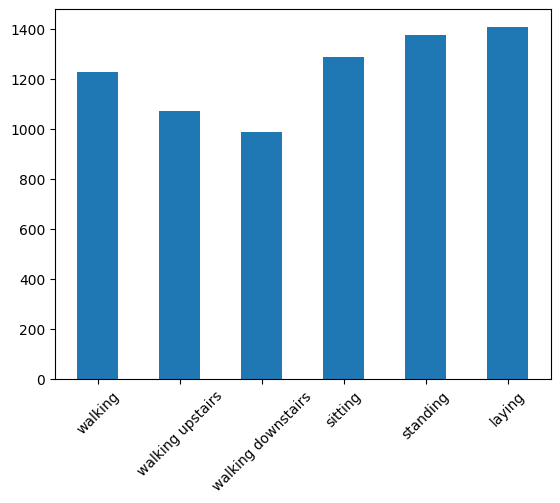

In [14]:
train_count=np.bincount(np.array(y_train_help))
for i in range(6):
    print(activities_description[i],train_count[i])
plt.bar(activities_description.values(), list(train_count), width=0.5)
plt.xticks(rotation=45)
plt.show()

In [15]:
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

for i in range(9):
    lista_mean = []
    for j in range(7352):
        senal = x_train[j,:,i]
        lista_mean.append(np.mean(senal))
    if i == 0:
        bix_train = pd.DataFrame(lista_mean)
    else:
        bi_aux = pd.DataFrame(lista_mean)
        bix_train = pd.concat([bix_train, bi_aux], axis=1)

bix_train.columns = SIGNALS 

In [16]:
bix_train.head()

,body_acc_x_,body_acc_y_,body_acc_z_,body_gyro_x_,body_gyro_y_,body_gyro_z_,total_acc_x_,total_acc_y_,total_acc_z_
0,0.002269,-0.001655,-0.008126,0.022250,0.019403,0.009468,1.019305,-0.124262,0.099732
1,0.000174,0.000382,-0.005025,0.011926,-0.004314,0.006308,1.019448,-0.122936,0.096939
2,0.000428,-0.001222,-0.001703,-0.004150,-0.012640,0.004335,1.019927,-0.124997,0.092897
3,0.000329,-0.004753,-0.004947,-0.016228,-0.007697,-0.000352,1.020349,-0.130493,0.087654
4,-0.000195,0.000298,-0.002330,-0.006483,-0.000166,-0.003957,1.020255,-0.130209,0.084999


In [17]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

info = datainfo(bix_train)
info

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
body_acc_x_,float64,7352,7352,0,0.0
body_acc_y_,float64,7352,7352,0,0.0
body_acc_z_,float64,7352,7352,0,0.0
body_gyro_x_,float64,7352,7352,0,0.0
body_gyro_y_,float64,7352,7352,0,0.0
body_gyro_z_,float64,7352,7352,0,0.0
total_acc_x_,float64,7352,7352,0,0.0
total_acc_y_,float64,7352,7352,0,0.0
total_acc_z_,float64,7352,7352,0,0.0


Observamos que no hay datos faltantes.

In [18]:
bix_train.describe()

,body_acc_x_,body_acc_y_,body_acc_z_,body_gyro_x_,body_gyro_y_,body_gyro_z_,total_acc_x_,total_acc_y_,total_acc_z_
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.000636,-0.000292,-0.000275,0.000506,-0.000824,0.000113,0.804749,0.028755,0.086498
std,0.014480,0.021406,0.018709,0.187867,0.059768,0.061655,0.366131,0.372431,0.342719
min,-0.263284,-0.515524,-0.294562,-0.914161,-0.351097,-0.437807,-0.370700,-0.494512,-0.988372
25%,-0.003009,-0.004052,-0.004190,-0.016216,-0.013213,-0.009825,0.902589,-0.220897,-0.127711
50%,-0.000079,-0.000042,-0.000122,-0.000002,-0.000198,-0.000097,0.983997,-0.124932,0.019812
75%,0.002243,0.003333,0.003473,0.017685,0.010035,0.010297,1.011098,0.167153,0.223316
max,0.148878,0.533502,0.366119,0.790661,0.485058,0.404380,1.055335,1.005326,0.977294


<Axes: >

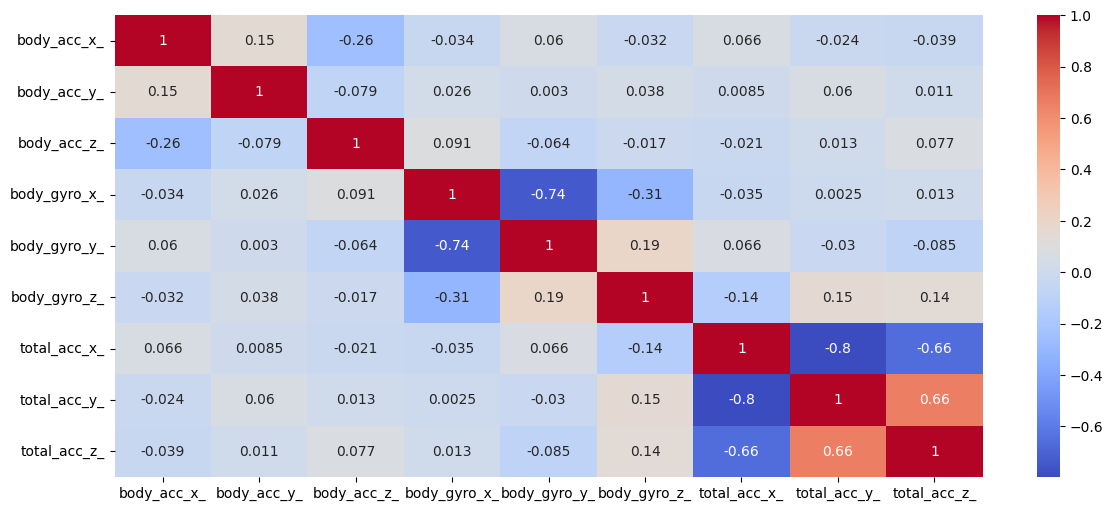

In [19]:
plt.figure(figsize=[14,6])
sns.heatmap(bix_train.loc[:, ~bix_train.columns.isin(['type'])].corr(), annot = True, cmap = 'coolwarm')

Es consistente el hecho de que cada sensor del mismo tipo aunque diferente eje, tenga mayor magnitud de correlación con ellos mismos.

body_acc_x_        Axes(0.125,0.653529;0.227941x0.226471)
body_acc_y_     Axes(0.398529,0.653529;0.227941x0.226471)
body_acc_z_     Axes(0.672059,0.653529;0.227941x0.226471)
body_gyro_x_       Axes(0.125,0.381765;0.227941x0.226471)
body_gyro_y_    Axes(0.398529,0.381765;0.227941x0.226471)
body_gyro_z_    Axes(0.672059,0.381765;0.227941x0.226471)
total_acc_x_           Axes(0.125,0.11;0.227941x0.226471)
total_acc_y_        Axes(0.398529,0.11;0.227941x0.226471)
total_acc_z_        Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

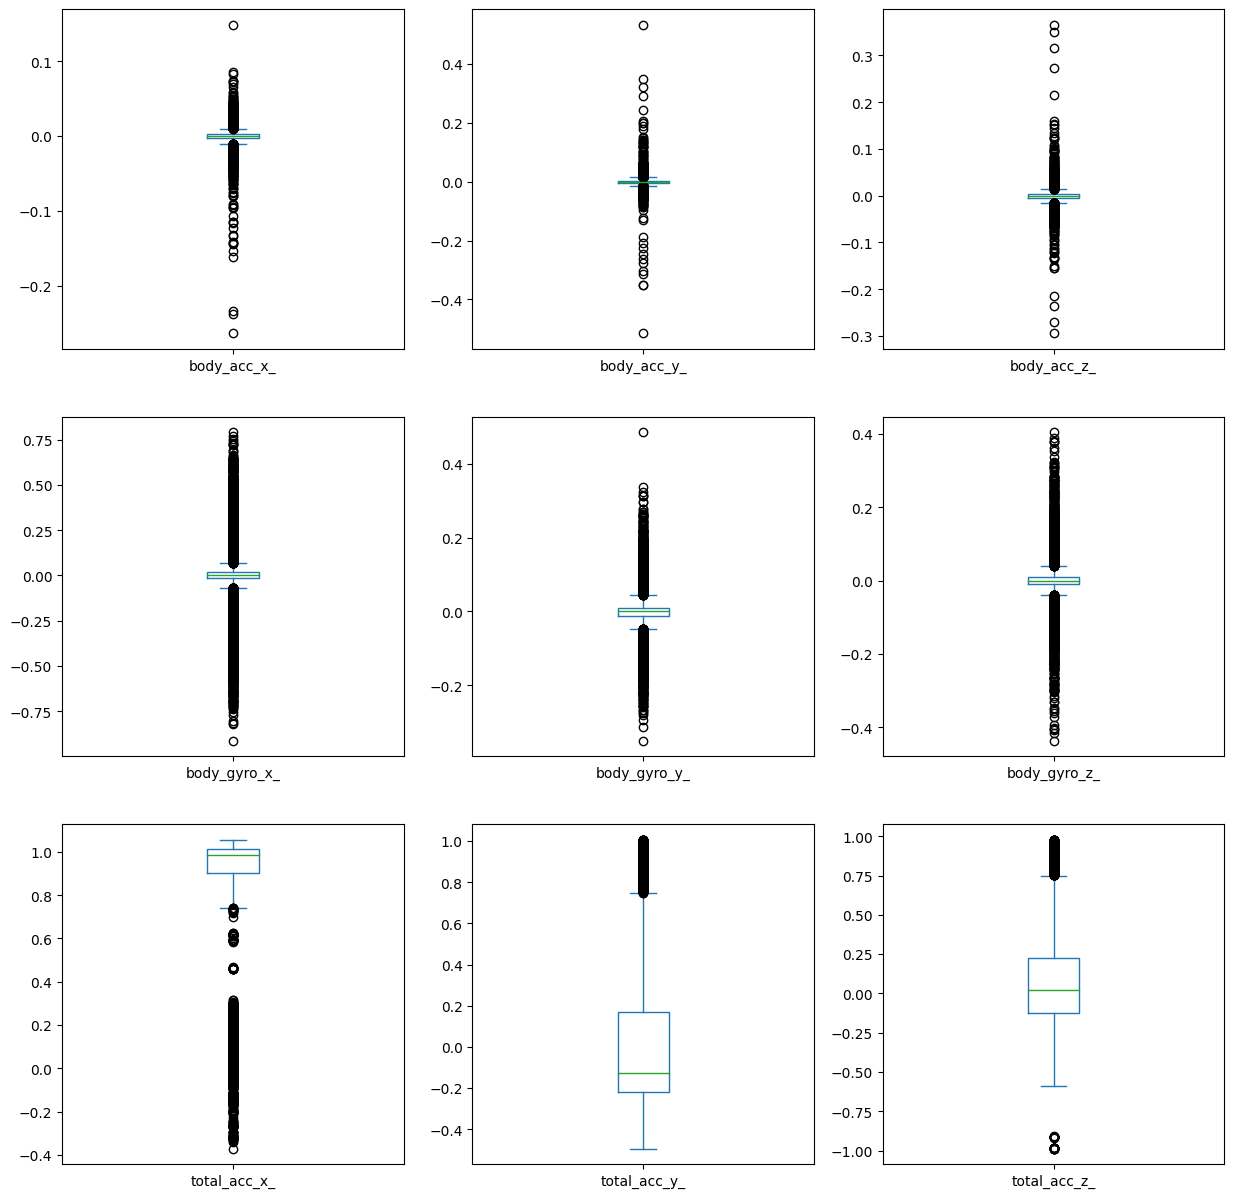

In [20]:
bix_train.plot(kind="box",subplots=True,layout=(3,3),figsize=(15,15))

Notamos que todos los sensores, exceptuando el sensor "acc" en los ejes Y,Z poseen un gran número de outliers que se escapan bastante de los límites. Los datos están bastante centrados.

array([[<Axes: title={'center': 'body_acc_x_'}>,
        <Axes: title={'center': 'body_acc_y_'}>,
        <Axes: title={'center': 'body_acc_z_'}>],
       [<Axes: title={'center': 'body_gyro_x_'}>,
        <Axes: title={'center': 'body_gyro_y_'}>,
        <Axes: title={'center': 'body_gyro_z_'}>],
       [<Axes: title={'center': 'total_acc_x_'}>,
        <Axes: title={'center': 'total_acc_y_'}>,
        <Axes: title={'center': 'total_acc_z_'}>]], dtype=object)

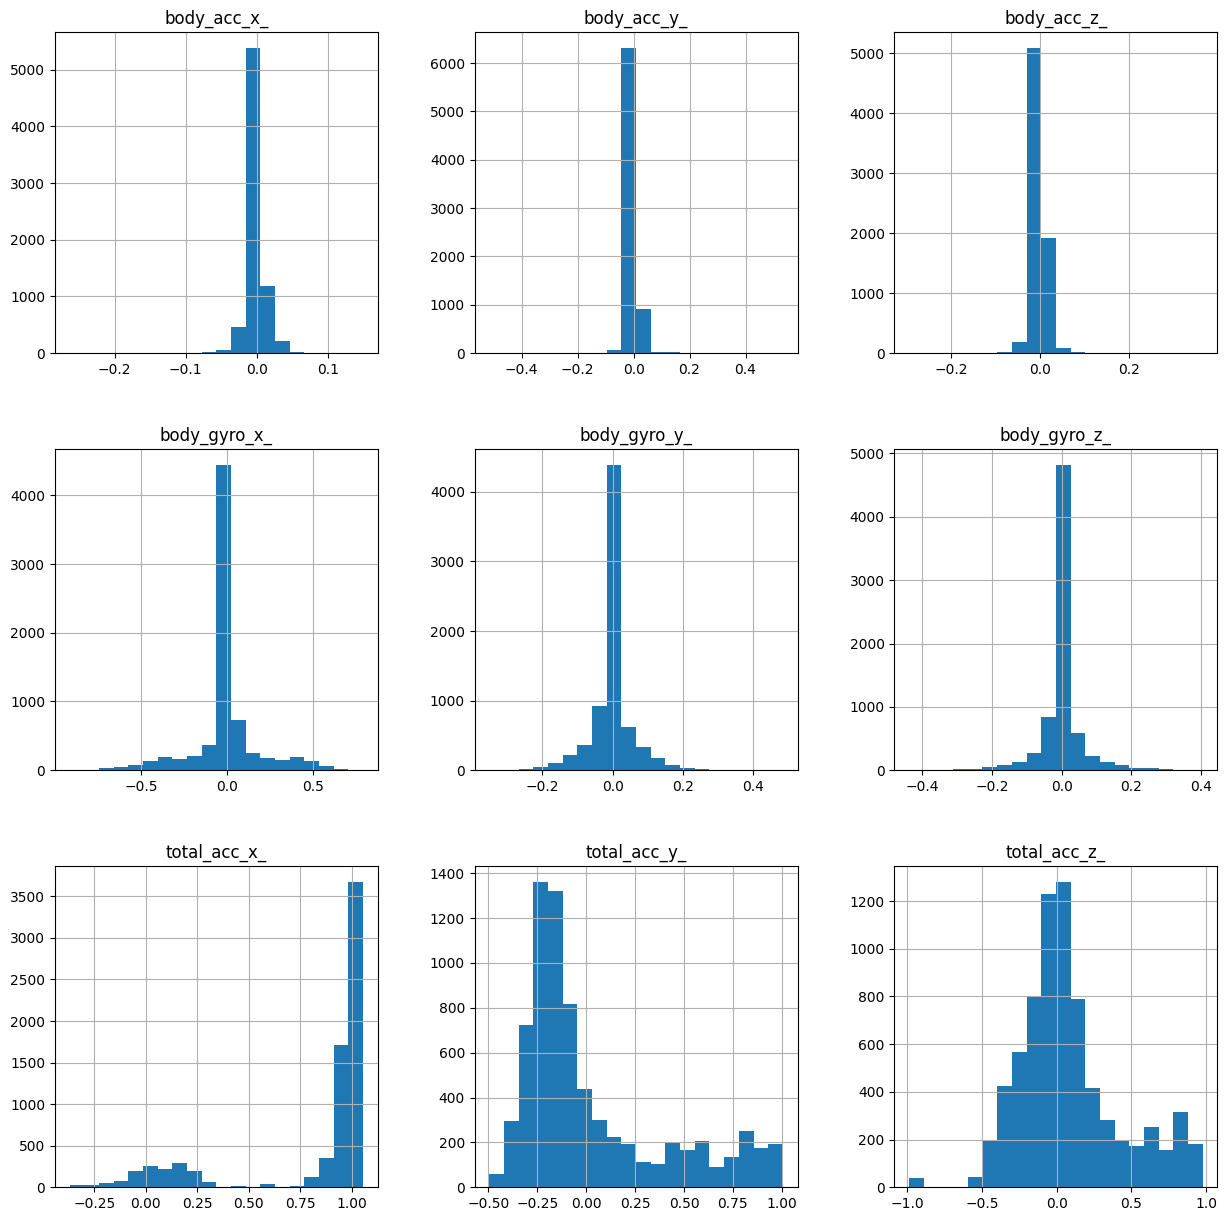

In [21]:
bix_train.hist(figsize=(15,15), layout=(3,3), bins=20)

En general las variables están concentradas mayormente en el 0 y como si fueran una distribución normal, salvo total_acc_x_ y total_acc_y_, la primera esta acumulada en el 1 y la segunda entre el 0 y el -0.5.

Podemos notar que los movimientos en el eje Y en total estan centrados en 0 ya que los datos y en las pruebas todos los tipos de moivmiento: pararse, agacharse, subir las escaleras, etc, se hacen en torno al eje z y al x, donde el eje y correspodne a moverse hacia los lados. Podemos notar que los movimientos en el eje Z hay una sobre representacion respecto a los valores positivos, lo cual se puede explciar porque hay mas datos de los locos subiendo escaleras y parandose que locos bajando la escalera o sentandose, luego es claro que la wea en el X esta centrada en 0 porque todos los movimientos son en la misma posicion o avanzando hacia adelante, donde no hay movimiento hacia atras por lo tanto no hay valores negativos como en los otros casos que provoquen que el promedio sea 0

In [22]:
def plot_distributions(trainX):
    # Remove overlap
    cut_index = int(trainX.shape[1] / 2)
    longX = trainX[:, -cut_index:, :]
    
    # Flatten windows
    flattened_data = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    
    # Calculate the number of features (columns)
    num_features = flattened_data.shape[1]
    
    # Calculate the number of rows and columns for subplots
    num_rows = num_features
    num_cols = 1
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 20))
    
    # Plot distributions in subplots
    for i, ax in enumerate(axes):
        ax.hist(flattened_data[:, i], bins=100)
        ax.set_xlim(-1, 1)
        ax.set_title(SIGNALS[i])
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()

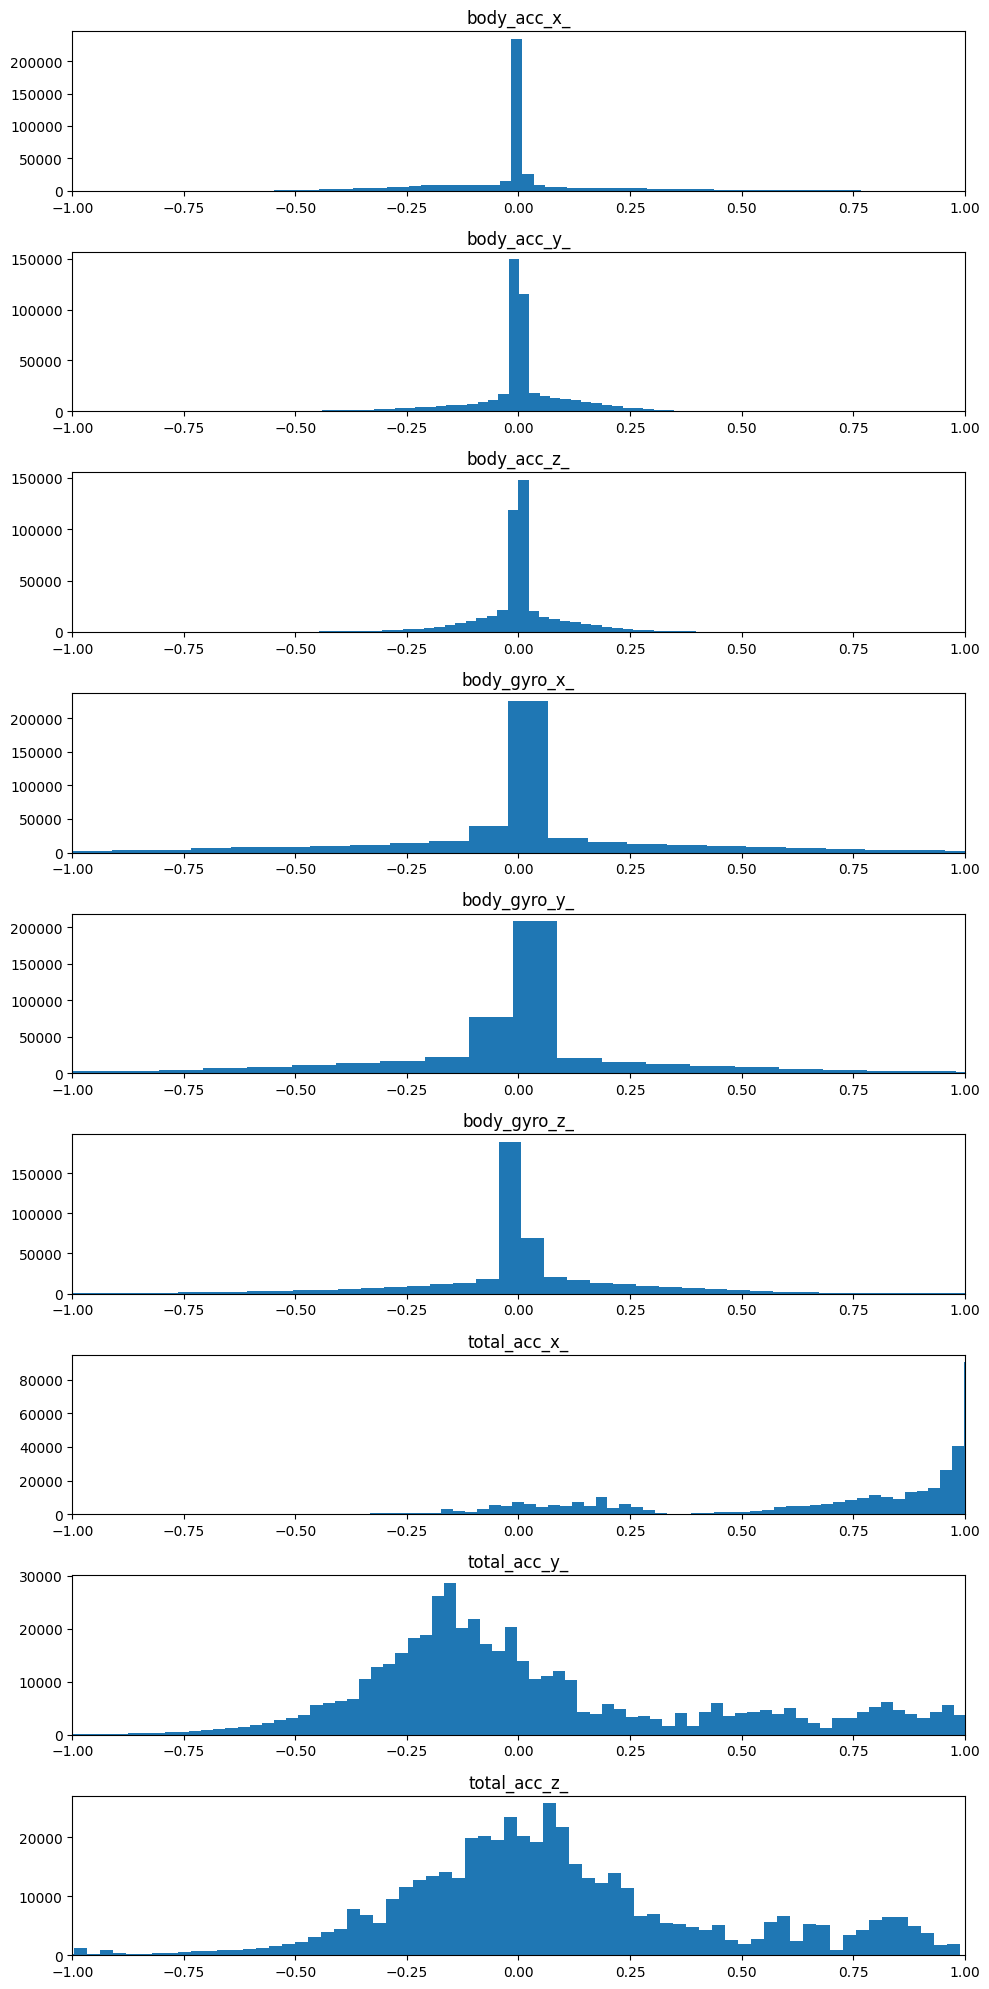

In [23]:
plot_distributions(x_train)

> d) Si quisiera entrenar una red neuronal feedforward con este conjunto de datos, ¿cómo deben representarse las dimensiones de cada experimento (sample) para que sirvan de entrada para este tipo de red?
>
> `Respuesta`: Deben tener 2 dimensiones donde la primera son las observaciones y la segunda una multiplicación de la segunda y la tercera, es decir, cada valor que tengamos en la segunda dimensión, lo multiplicaremos por cada uno de los valores de la tercera dimensión.

> e) Modifique las dimensiones de los atributos para luego entrenar una red neuronal feedforward.
>
> `Respuesta`: Esto se realiza en el siguiente código.

In [24]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

> f) ¿Cómo quedó cada atributo ahora que modificó sus dimensiones?

f) `Respuesta`: Cada atributo quedó como la 'multiplicación' del atributo de la segunda dimensión previa con cada una de las dimensiones de la tercera dimensión previa.

In [25]:
print(f'X_train: {x_train.shape}')
print(f'X_test: {x_test.shape}')

X_train: (7352, 1152)
X_test: (2947, 1152)


### 2.1.3 Procesamiento del conjunto de datos

> a) Transforme las clases a One Hot Encoder

In [26]:
onehot_encoder = OneHotEncoder(sparse_output=False)

y_train_OHE = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_OHE = onehot_encoder.transform(y_test.reshape(len(y_test), 1))

# Print the original labels and the one-hot encoded labels
print("Original Labels:")
print(y_train.shape)
print("\nOne-Hot Encoded Labels:")
print(y_train_OHE.shape)

Original Labels:
(7352,)

One-Hot Encoded Labels:
(7352, 6)


In [27]:
LABELS[np.argmax(y_train_OHE[400])]

'SITTING'

> b) ¿Estan bien balanceadas las clases?

b) `Respuesta`: Sí, como se ve en el siguiente grafico

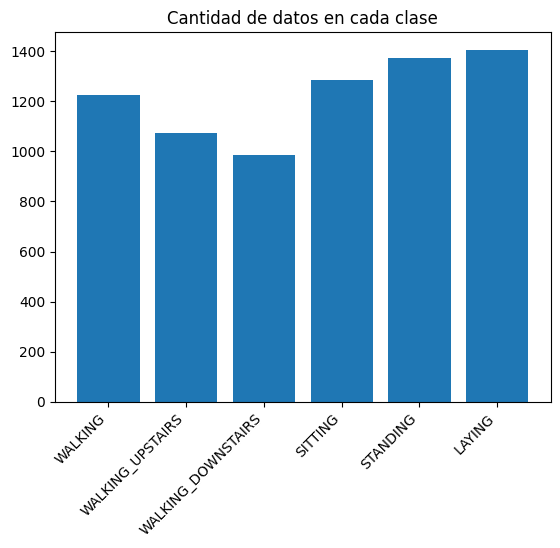

In [28]:
valores = np.sum(y_train_OHE, axis=0)
indices = np.arange(len(valores))

# Crear el gráfico de barras
plt.bar(indices, valores)
plt.xticks(indices, LABELS, rotation=45, ha='right')
plt.title('Cantidad de datos en cada clase')

# Mostrar el gráfico
plt.show()

> c) Estandarice los atributos con media 0 y variaza 1.

In [29]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
x_scaler = StandardScaler()

# Fit the scaler on the training data
x_scaler.fit(x_train)

# Apply the scaler to transform the training data
x_train = x_scaler.transform(x_train)
x_test = x_scaler.transform(x_test)

## 2.2 Modelos de clasificación

### 2.2.1 Redes Neuronales

> a) ¿Cómo se entrena una red neuronal feedforward?
>
> `Respuesta`: Para entrenar una red neuronal feedforward, se siguen los siguientes pasos:
>
>1. **Inicialización de pesos**: Se inicializan los pesos de la red neuronal de manera aleatoria o utilizando algún esquema predefinido.
>
>2. **Propagación hacia adelante (forward propagation)**: Se pasa la entrada a través de la red neuronal capa por capa, aplicando una serie de transformaciones lineales y no lineales (funciones de activación) en cada capa oculta. Esto produce una predicción de salida.
>
>3. **Cálculo de la función de pérdida**: Se compara la predicción de salida con los valores de salida reales y se calcula la diferencia mediante una función de pérdida.
>
>4. **Retropropagación del error (backpropagation)**: Se propaga el error desde la capa de salida hacia atrás a través de la red, ajustando los pesos en cada capa según la contribución del error de cada neurona. Esto se hace utilizando el gradiente descendente para minimizar la función de pérdida.
>
>5. **Actualización de pesos**: Se actualizan los pesos de la red neuronal utilizando un algoritmo de optimización; minimizando la función de pérdida, como el descenso de gradiente estocástico (SGD) o algoritmos más avanzados como Adam.
>
>6. **Repetición del proceso**: Se repiten los pasos 2 a 5 para cada lote de datos en el conjunto de entrenamiento, en un número determinado de épocas, hasta que se alcance un criterio de parada, como convergencia o un número máximo de épocas.
>
>7. **Evaluación del rendimiento**: Una vez que la red neuronal ha sido entrenada, se evalúa su rendimiento utilizando conjuntos de datos de validación o prueba para medir la precisión de las predicciones.
>
>Este proceso se repite iterativamente hasta que la red neuronal logre aprender los patrones y relaciones en los datos de entrenamiento y pueda realizar predicciones precisas en nuevos datos.

> b) ¿Qué es una neurona en este contexto?
>
> `Respuesta`: Una neurona se refiere a una unidad computacional básica que procesa y transmite información. Cada neurona recibe una combinación lineal de las salidas de las neuronas de la capa anterior, realiza una operación de suma ponderada de estas entradas y aplica una función de activación no lineal a la suma ponderada para generar una salida. 

> c) ¿Qué es una función de activación y para que sirven?
>
> `Respuesta`: Es una función matemática que se aplica a la salida de una neurona para introducir no linealidad en la red. Estas funciones son fundamentales para que las redes neuronales sean capaces de aprender y modelar relaciones complejas en los datos.

> d) ¿A qué se le llama capa densa?
>
> `Respuesta`: Es un tipo de capa en la que cada neurona está conectada a todas las neuronas de la capa anterior. En otras palabras, todas las entradas de una capa densa están conectadas a todas las salidas de la capa anterior.

> e) Si usted conoce la dimensión entrada, la de salida, la cantidad de capas y neuronas de cada capa, ¿cómo se calcula la cantidad de pesos de la red?
>
> `Respuesta`: Se debe conocer además el orden de las capas ocultas. Se calcula sumando las intersecciones entre las capas, es decir, sumando las multiplicaciones entre los números de neuronas con las capas adyacentes (note que a cada capa se le debe añadir un x_0 = 1)).

> f) ¿A qué se refiere el fenómeno de gradiente desvaneciente?, ¿y el gradiente explosivo?
>
>`Respuesta`: 

### Copiar del cuestionario!

> g) Para esta tarea, como debería ser la capa de salida de la red considerando que previemente aplicó una transformación One Hot Encoding a las clases del conjunto?
>
> `Respuesta`: Debe ser una salida con 6 neuronas. Sin embargo, después se puede aplicar softmax para determinar aquel índice (label) con mayor probabilidad de ser la predicción.

> h) Considere que la capa de entrada se llama "input_layer",  a la capa de salida le llamaremos "output_layer" y a las capas intermedias "hidden_layer(_units_, _activation_)" donde los parametros significan el numero de neuronas que tiene esa capa densa (Dense en Keras) y su activación. Cree las siguientes redes neuronales:
>
>* input_layer -> output_layer
>
>* input_layer -> hidden_layer(32, tanh) -> output_layer
>
>* input_layer -> hidden_layer(32, sigmoid) -> output_layer
>
>* input_layer -> hidden_layer(32, relu) -> output_layer
>
> `Respuesta`: Se realiza en código.

> i) Una vez creado el modelo, imprima el sumario (modelo.summary()) y compare los resultados obtenidos con su razonamiento explicado en la pregunta e).

In [30]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.activations import softmax, tanh, sigmoid, relu

input_layer = Input(shape = (x_train.shape[1:]))
output_layer_0 = Dense(units=6, activation=softmax)(input_layer)
ANN_0 = Model(inputs=input_layer, outputs=output_layer_0)
print(f'{ANN_0.summary()}')
print('\n\n')

hidden_1 = Dense(units=32, activation=tanh)(input_layer)
output_layer_1 = Dense(units=6, activation=softmax)(hidden_1)
ANN_1 = Model(inputs=input_layer, outputs=output_layer_1)
print(f'{ANN_1.summary()}')
print('\n\n')

hidden_2 = Dense(units=32, activation=sigmoid)(input_layer)
output_layer_2 = Dense(units=6, activation=softmax)(hidden_2)
ANN_2= Model(inputs=input_layer, outputs=output_layer_2)
print(f'{ANN_2.summary()}')
print('\n\n')

hidden_3 = Dense(units=32, activation=relu)(input_layer)
output_layer_3 = Dense(units=6, activation=softmax)(hidden_3)
ANN_3 = Model(inputs=input_layer, outputs=output_layer_3)
print(f'{ANN_3.summary()}')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense (Dense)               (None, 6)                 6918      
                                                                 
Total params: 6,918
Trainable params: 6,918
Non-trainable params: 0
_________________________________________________________________
None



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_1 (Dense)             (None, 32)                36896     
                                                                 
 dense_2 (Dense)             (None

i) `Respuesta`: Para el modelo 0 efectivamente se tiene (1152 + 1) * 6 = 6918. Para los otros 3 modelos, como compartes número de capas y sus números de neuronas respectivas, también se cumple que (1152 + 1) * 32 + (32 + 1) * 6 = 37094.

 > j) Defina un callback de Early Stopping para evitar un sobre ajuste de la red basandose en sus respuestas a las siguientes preguntas:

* ¿Qué es lo que se debería monitorear para evitar el sobre ajuste en esta red?

    `Respuesta`: El error en el conjunto de entrenamiento y prueba. Si el error en el conjunto de entrenamiento sigue disminuyendo, pero  en el conjunto de prueba comienza a aumentar o se estabiliza, puede ser una señal de sobreajuste.

    También se puede considerar la precisión en estos conjuntos. Si la precisión en el conjunto de entrenamiento sigue mejorando mientras que en el conjunto de prueba se estanca o disminuye, es un indicio de posible sobreajuste.

* ¿Qué es la paciencia en este contexto?

    `Respuesta`: Es la cantidad de épocas (consecutivas) que el modelo puede tolerar sin mejoras antes de considerar que se ha alcanzado el sobreajuste y detener el entrenamiento.

* ¿Para qué se usa el parámetro min_delta?

    `Respuesta`: Se utiliza para especificar la cantidad mínima de cambio que se debe considerar como una mejora significativa en la métrica monitoreada.

> k) Compile el modelo usando como optimizador el gradiente descendente estocástico, utilice la métrica "categorical_accuracy" y responda lo siguiente:

* ¿Qúe función de pérdida se debe usar para este problema (loss)?

    `Respuesta`: Entropía cruzada categórica, pues calcula la pérdida entre la distribución de probabilidad predicha por la red neuronal y la distribución de probabilidad real de las clases.


**Nota:** Si bien en un mundo ideal donde hay tiempo y recursos para explorar un subconjunto del espacio de hipótesis lo suficientemente amplio como para cubrir todas las posibles combinaciones de hiperparámetros, en esta tarea solo se explorarán algunos.

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_categorical_accuracy', mode='max', verbose=0, patience=7, min_delta=0.001, restore_best_weights = True)
ANN_0.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

> l) Entrene el modelo utilizando el callback definido en la pregunta anterior con 100 epochs,un batch_size=256, y validation split=0.1.

* ¿Qué significa el batch_size?

    l) `Respuesta`: Se refiere al número de muestras de entrenamiento que se utilizan en cada paso de actualización de los pesos de la red neuronal.

    Durante el entrenamiento de una red neuronal, los datos se dividen en lotes (batches) y se procesan en paralelo. En cada paso de actualización de pesos, los gradientes se calculan en función de las muestras de entrenamiento en el lote actual y se utilizan para ajustar los pesos de la red.

**Nota:** Por favor recuerde ocultar el output del entrenamiento!! Mantenga el orden de su tarea y justifique de forma óptima sus resultados.

In [32]:
history_0 = ANN_0.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

history_1 = ANN_1.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

history_2 = ANN_2.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

history_3 = ANN_3.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/100


26/26 [==============================] - 0s 8ms/step - loss: 1.5348 - categorical_accuracy: 0.4654 - val_loss: 1.3097 - val_categorical_accuracy: 0.5571
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 1.2454 - categorical_accuracy: 0.5653 - val_loss: 1.2013 - val_categorical_accuracy: 0.5693
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 1.1470 - categorical_accuracy: 0.5899 - val_loss: 1.1605 - val_categorical_accuracy: 0.5829
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 1.0881 - categorical_accuracy: 0.6001 - val_loss: 1.1388 - val_categorical_accuracy: 0.5503
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 1.0522 - categorical_accuracy: 0.5999 - val_loss: 1.1234 - val_categorical_accuracy: 0.5720
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 1.0247 - categorical_accuracy: 0.6099 - val_loss: 1.1076 - val_categorical_accuracy: 0.5720
Epoch 7/100
26/26 [===

In [33]:
print(history_0.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [34]:
def plotear_hist_acc(history):
    plt.figure(figsize = (7,5))

    # Get the number of epochs
    epochs = range(1, len(history.history["val_categorical_accuracy"]) + 1)

    plt.plot(epochs, history.history["categorical_accuracy"], marker = "o", label='Training Accuracy')
    plt.plot(epochs, history.history["val_categorical_accuracy"], marker = "o", label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.ylim((0.5, 1))
    plt.title("Learning Curves")
    plt.show()

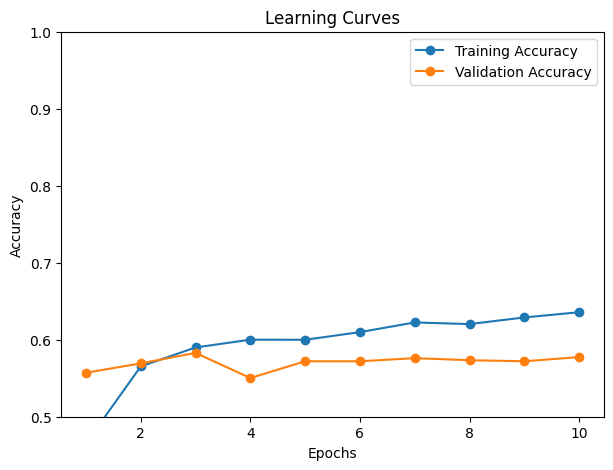

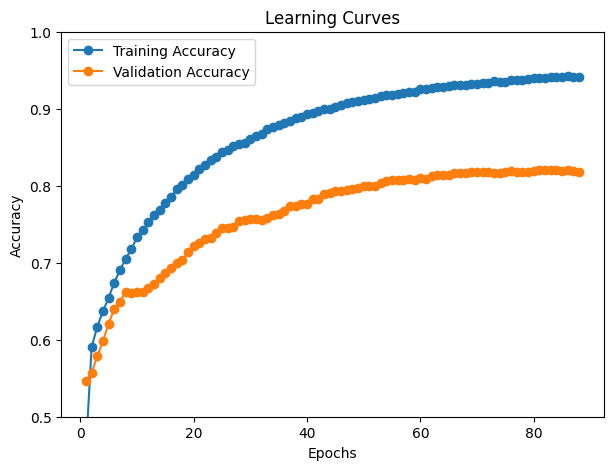

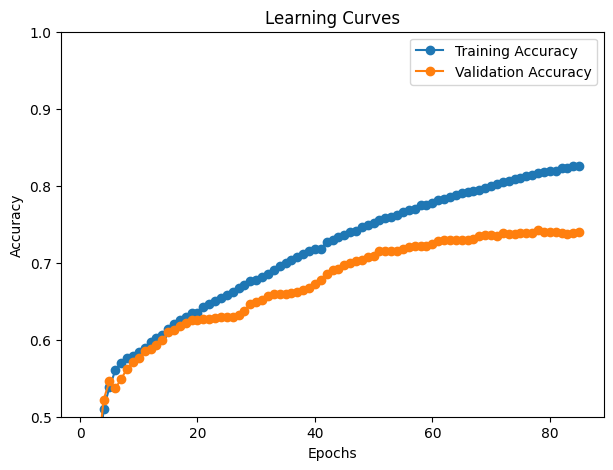

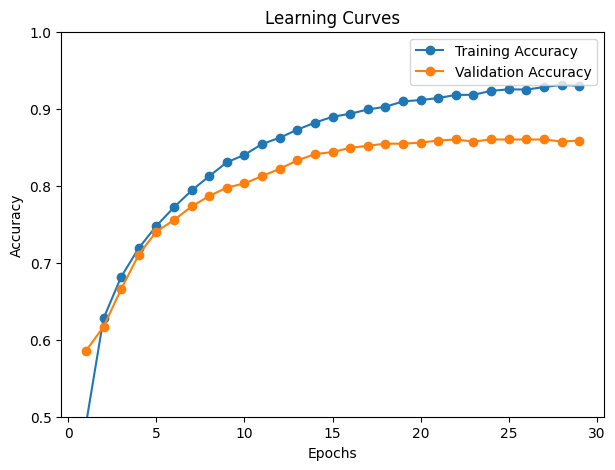

In [35]:
plotear_hist_acc(history_0)
plotear_hist_acc(history_1)
plotear_hist_acc(history_2)
plotear_hist_acc(history_3)

> m) Escoja el mejor modelo según la función de activación y puntuación obtenida en el conjunto de validación y pruebe con los siguientes modelos:

* input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [36]:
best = 0
best_acc = 0
best_history = {}

for model, history in [(0, history_0),(1, history_1),(2, history_2),(3, history_3)]:
    max_acc = max(history.history["val_categorical_accuracy"])
    print(f'Modelo {model}: {max_acc}')
    if max_acc > best_acc:
        best = model
        best_acc = max_acc
        best_history = history

print('-----------------------------------------------------------------')

print(f'El mejor modelo es el {best} con un accuracy de {round(best_acc,3)}' )

Modelo 0: 0.582880437374115
Modelo 1: 0.820652186870575
Modelo 2: 0.741847813129425
Modelo 3: 0.8600543737411499
-----------------------------------------------------------------
El mejor modelo es el 3 con un accuracy de 0.86


> m) `Respuesta pt. 1` : El mejor modelo fue el último (función de activación ReLu para la capa escondida)

In [37]:
hidden_4_1 = Dense(units=64, activation=relu)(input_layer)
hidden_4_2 = Dense(units=32, activation=relu)(hidden_4_1)
output_layer_4 = Dense(units=6, activation=softmax)(hidden_4_2)
ANN_4 = Model(inputs=input_layer, outputs=output_layer_4)
ANN_4.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

hidden_5_1 = Dense(units=128, activation=relu)(input_layer)
hidden_5_2 = Dense(units=64, activation=relu)(hidden_5_1)
hidden_5_3 = Dense(units=32, activation=relu)(hidden_5_2)
output_layer_5 = Dense(units=6, activation=softmax)(hidden_5_3)
ANN_5 = Model(inputs=input_layer, outputs=output_layer_5)
ANN_5.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

hidden_6_1 = Dense(units=256, activation=relu)(input_layer)
hidden_6_2 = Dense(units=128, activation=relu)(hidden_6_1)
hidden_6_3 = Dense(units=64, activation=relu)(hidden_6_2)
hidden_6_4 = Dense(units=32, activation=relu)(hidden_6_3)
output_layer_6 = Dense(units=6, activation=softmax)(hidden_6_4)
ANN_6 = Model(inputs=input_layer, outputs=output_layer_6)
ANN_6.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [38]:
history_4 = ANN_4.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

history_5 = ANN_5.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

history_6 = ANN_6.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/100
26/26 [==============================] - 1s 8ms/step - loss: 1.5690 - categorical_accuracy: 0.4504 - val_loss: 1.3103 - val_categorical_accuracy: 0.5652
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 1.1760 - categorical_accuracy: 0.6149 - val_loss: 1.1066 - val_categorical_accuracy: 0.6291
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 1.0119 - categorical_accuracy: 0.6921 - val_loss: 0.9652 - val_categorical_accuracy: 0.6970
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.8879 - categorical_accuracy: 0.7349 - val_loss: 0.8567 - val_categorical_accuracy: 0.7147
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7869 - categorical_accuracy: 0.7755 - val_loss: 0.7730 - val_categorical_accuracy: 0.7418
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7030 - categorical_accuracy: 0.8079 - val_loss: 0.7078 - val_categorical_accuracy: 0.7785
Epoch 7/10

>n) Imprima las curvas de error y accuracy del conjunto de entrenamiento y de validación para observar como se comporta el _aprendizaje_ de sus modelos.

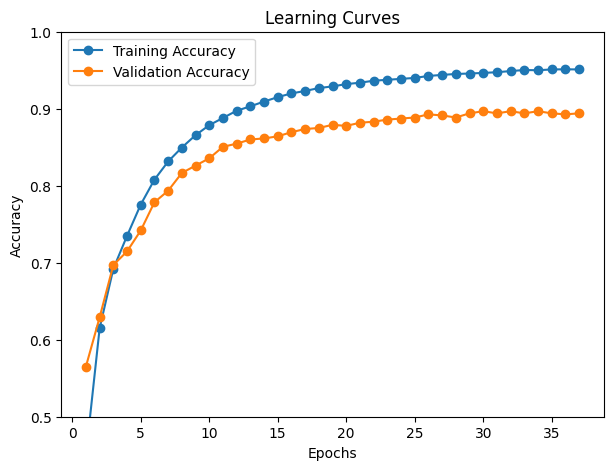

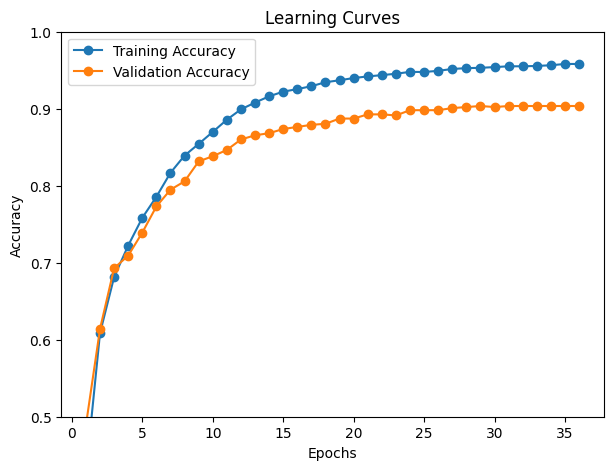

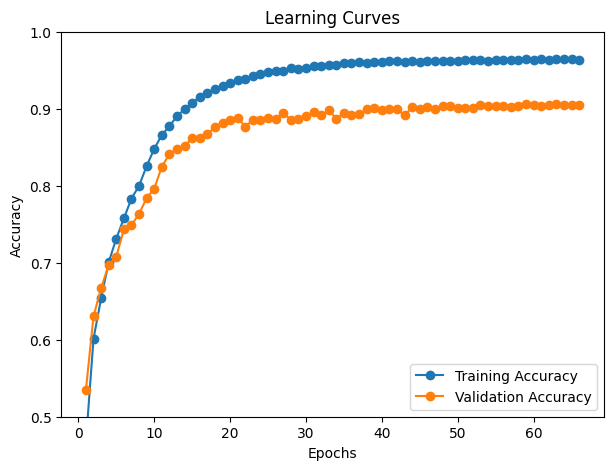

In [39]:
plotear_hist_acc(history_4)
plotear_hist_acc(history_5)
plotear_hist_acc(history_6)

> o) Una vez terminados los entrenamientos elija la mejor red hasta ahora y entrénela con el conjunto de entrenamiento completo sin validation split.

In [40]:
for model, history in [(best, best_history),(4, history_4),(5, history_5),(6, history_6)]:
    max_acc = max(history.history["val_categorical_accuracy"])
    print(f'Modelo {model}: {max_acc}')
    if max_acc > best_acc:
        best = model
        best_acc = max_acc
        best_history = history

print('-----------------------------------------------------------------')

print(f'El mejor modelo es el {best} con un accuracy de {round(best_acc,3)}' )

Modelo 3: 0.8600543737411499
Modelo 4: 0.89673912525177
Modelo 5: 0.9035326242446899
Modelo 6: 0.90625
-----------------------------------------------------------------
El mejor modelo es el 6 con un accuracy de 0.906


In [46]:
ANN = ANN_6
ANN.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history = ANN.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  callbacks=[early_stop])

Epoch 1/100


29/29 [==============================] - 1s 7ms/step - loss: 0.1109 - categorical_accuracy: 0.9572
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1078 - categorical_accuracy: 0.9593
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1058 - categorical_accuracy: 0.9606
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1043 - categorical_accuracy: 0.9596
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1026 - categorical_accuracy: 0.9607
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1014 - categorical_accuracy: 0.9610
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1005 - categorical_accuracy: 0.9621
Epoch 8/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0999 - categorical_accuracy: 0.9611
Epoch 9/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0992 - categorical_accuracy: 0.9614
Epoch 10/100


In [47]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy'])


> p) Procese las predicciones del modelo sobre el conjunto de test para que pueda comparar los errores usando un heatmap de la matriz de confusión.

p) `Respuesta`: Se realiza con los siguientes códigos.

In [48]:
y_pred = ANN(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

[4 4 4 ... 1 1 1]


In [49]:
y_test_comp = np.argmax(y_test_OHE, axis=1)

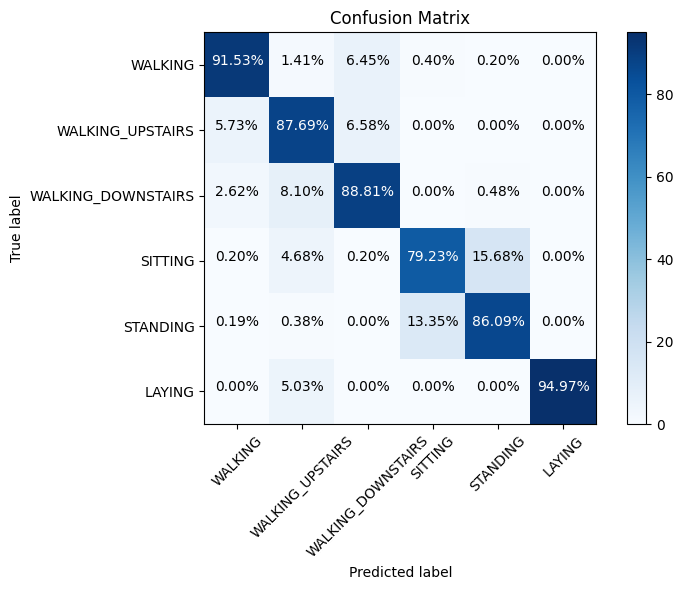

In [51]:
from sklearn.metrics import confusion_matrix

cat = np.array([1,2,3,4,5,6]) 

# Create the confusion matrix
cm = confusion_matrix(cat[y_test_comp], cat[y_pred])

# Convert the confusion matrix to percentages
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_percent, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=45)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm_percent.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        if cm_percent[i, j] != 0:
            plt.text(j, i, format(cm_percent[i, j], '.2f') + '%',
                horizontalalignment="center",
                color="white" if cm_percent[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()


> q) Comente acerca de los resultados y explique cual es la actividad que mejor logra clasificar la red.

q) `Respuesta`: Tenemos que el mejor movimiento que precide es el LAYING y el peor Sitting, tambien notamos 2 patrones de errores, el primero alrededor de SITTING Y STANDING que al ser movimientos que se mueven en el mismo eje y parecidos estan propensos a ser confundidos, además si nos enfocamos solo en estas 2 variables los "errores de tipo 1 y 2" estan equilibrados, esto se puede deber a la misma razón anteriormente dicha , mismo caso con WALKING_DOWNSTAIRS y WALKING_UPSSTAIRS.

De igual manera podemos decir que los resulados son buenos y la red logra clasficiar una buena parte de los datos de la manera adecuada.

### 2.2.2 AdaBoost y arbustos

> a) Describa brevemente como funciona el modelo AdaBoost.

a) `Respuesta`:

> b) ¿Qué clasificador se puede usar junto con Adaboost?

b) `Respuesta`:

> c) ¿Cómo funciona el _learning rate_ en el modelo AdaBoost?

c) `Respuesta`:

> d) Separe el conjunto de entrenamiento dejando el 10% para validación.

d) `Respuesta`:

> e) Entrene un clasificador AdaBoost con un arbusto (árbol de profundidad=2) con 300 estimadores y learning_rate=1

e) `Respuesta`:

**Nota:** Este modelo no usa One Hot Encoder para las clases, investigue como preprocesar los datos del conjunto para entrenar este modelo. Puede guiarse con el siguiente tutorial de sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py

a) GPT: AdaBoost (Adaptive Boosting) es un algoritmo de aprendizaje automático que utiliza un conjunto de clasificadores débiles para construir un clasificador fuerte. Su funcionamiento se puede describir en los siguientes pasos:

1. Inicialización: Se asigna un peso igual a cada muestra de entrenamiento. Estos pesos indican la importancia de cada muestra en el proceso de entrenamiento.

2. Entrenamiento de clasificadores débiles: Se entrena un clasificador débil utilizando las muestras de entrenamiento ponderadas por sus pesos. Un clasificador débil es un modelo de aprendizaje automático que tiene un rendimiento ligeramente mejor que el azar, como un árbol de decisión con una profundidad limitada.

3. Evaluación del rendimiento: Se evalúa el rendimiento del clasificador débil en las muestras de entrenamiento. Las muestras mal clasificadas reciben un peso mayor, lo que las hace más importantes para el siguiente clasificador débil.

4. Actualización de pesos: Se actualizan los pesos de las muestras de entrenamiento en función de su rendimiento y se asignan nuevos pesos a las muestras mal clasificadas.

5. Construcción del clasificador fuerte: Se repiten los pasos 2 a 4 varias veces, entrenando un conjunto de clasificadores débiles en secuencia. Cada clasificador se ajusta a las muestras de entrenamiento con mayor énfasis en las muestras que fueron clasificadas incorrectamente por los clasificadores anteriores.

6. Combinación de clasificadores débiles: Se combina el conjunto de clasificadores débiles para formar un clasificador fuerte mediante una combinación ponderada de sus resultados individuales. La combinación se basa en los pesos asignados a cada clasificador débil durante el entrenamiento.

En resumen, AdaBoost construye un clasificador fuerte al iterar sobre clasificadores débiles y asignar pesos a las muestras de entrenamiento en función de su dificultad de clasificación. El clasificador fuerte final tiene en cuenta las fortalezas individuales de los clasificadores débiles y puede mejorar significativamente el rendimiento de clasificación en comparación con el uso de un solo clasificador débil.

b) GPT: AdaBoost es un algoritmo de ensemble learning que puede utilizarse junto con varios clasificadores débiles. En teoría, se puede utilizar cualquier clasificador débil como base para AdaBoost. Algunos ejemplos comunes de clasificadores débiles utilizados con AdaBoost son:

1. Decision Trees (Árboles de decisión): Los árboles de decisión son clasificadores débiles populares utilizados en combinación con AdaBoost. Estos árboles de decisión se conocen como "stumps" cuando tienen solo una sola división o "decision stumps" cuando tienen una profundidad limitada.

2. SVM (Support Vector Machines): Los clasificadores SVM también se pueden utilizar como clasificadores débiles en el algoritmo AdaBoost. Se pueden ajustar clasificadores SVM con distintos kernels para adaptarse a diferentes tipos de datos.

3. Naive Bayes: Los clasificadores Naive Bayes, que se basan en el teorema de Bayes y asumen independencia condicional entre las características, también pueden utilizarse con AdaBoost.

4. Redes Neuronales: Las redes neuronales con una sola capa oculta o con una estructura simplificada también pueden ser clasificadores débiles utilizados con AdaBoost.

Es importante destacar que AdaBoost no está limitado a un solo tipo de clasificador débil y se puede combinar con una variedad de algoritmos para construir un clasificador fuerte. La elección del clasificador débil depende del problema específico y de las características de los datos.

c) GPT: El _learning rate_ en el modelo AdaBoost es un hiperparámetro que controla la contribución de cada clasificador débil al modelo final. Determina la cantidad con la que se ajustan los pesos de los clasificadores débiles durante el proceso de entrenamiento.

En AdaBoost, en cada iteración del algoritmo, se ajustan los pesos de las instancias de entrenamiento para dar más importancia a las instancias que fueron clasificadas incorrectamente por los clasificadores anteriores. El _learning rate_ controla qué tan rápido se ajustan estos pesos. Un valor de _learning rate_ bajo indica un ajuste más lento, mientras que un valor alto indica un ajuste más rápido.

Un _learning rate_ bajo significa que cada clasificador débil contribuye menos al modelo final, lo que resulta en un modelo más conservador y menos propenso a sobreajustar los datos de entrenamiento. Por otro lado, un _learning rate_ alto permite que cada clasificador débil tenga una mayor influencia en el modelo final, lo que puede conducir a un ajuste más preciso de los datos de entrenamiento, pero también aumenta el riesgo de sobreajuste.

Es importante ajustar el valor del _learning rate_ cuidadosamente, ya que un valor demasiado bajo puede hacer que el modelo requiera muchas iteraciones para converger, mientras que un valor demasiado alto puede conducir a una convergencia rápida pero a un rendimiento subóptimo. Por lo tanto, encontrar un equilibrio adecuado es crucial para obtener buenos resultados con AdaBoost.

In [52]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [53]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

In [54]:
ada.fit(x_train2, y_train2)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

> f) Revise el error de validación con el conjunto de validaión.

In [55]:
ada_val_errors = []

ada_val_errors = []
total_weight = sum(ada.estimator_weights_)  # Suma de los pesos de todos los clasificadores débiles

for pred, weight in zip(ada.staged_predict(x_val), ada.estimator_weights_):
    weighted_error = sum(weight * (pred != y_val)) / (total_weight*len(pred))
    ada_val_errors.append(weighted_error)

n_trees_ada = len(ada_val_errors)

> g) Haga la misma prueba pero ahora con 30 estimadores

In [56]:
ada2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=1
)

ada2.fit(x_train2, y_train2)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=30)

In [57]:
ada2_val_errors = []

ada2_val_errors = []
total_weight = sum(ada2.estimator_weights_)  # Suma de los pesos de todos los clasificadores débiles

for pred, weight in zip(ada2.staged_predict(x_val), ada2.estimator_weights_):
    weighted_error = sum(weight * (pred != y_val)) / (total_weight*len(pred))
    ada2_val_errors.append(weighted_error)

n_trees_ada2 = len(ada2_val_errors)

> h) Una vez encontrado el mejor modelo basandose en el error de validación, entrene el mejor modelo con todo el conjunto de entrenamiento, es decir, sin hacer _validation split_ y luego evalúe el modelo sobre el conjunto de pruebas.

In [58]:
error_total_ada = sum(ada_val_errors)
error_total_ada2 = sum(ada2_val_errors) 
print(f'error en Ada: {error_total_ada}')
print(f'error en Ada2: {error_total_ada2}')
print('-------------------------------------------------')

best_ada = ada

if error_total_ada < error_total_ada2:
    print(f'El mejor modelo es Ada (el de 300 estimadores)')
else:
    print(f'El mejor modelo es Ada2 (el de 30 estimadores)')
    best_ada = ada2

error en Ada: 0.19297101449275356
error en Ada2: 0.2926630434782609
-------------------------------------------------
El mejor modelo es Ada (el de 300 estimadores)


In [59]:
best_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

In [60]:
best_ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

In [61]:
best_ada_errors = []
total_weight = sum(best_ada.estimator_weights_)  # Suma de los pesos de todos los clasificadores débiles

for pred, weight in zip(best_ada.staged_predict(x_test), best_ada.estimator_weights_):
    weighted_error = sum(weight * (pred != y_test)) / (total_weight*len(pred))
    best_ada_errors.append(weighted_error)

n_trees_best_ada = len(best_ada_errors)
error_total_best_ada = sum(best_ada_errors)

print(f'error en BEST Ada: {error_total_best_ada}')

error en BEST Ada: 0.28833163669268197


In [62]:
print(ada.predict(x_test))

[5 5 5 ... 1 2 2]


> i) Muestre la matriz de confusión y comente sus resultados.

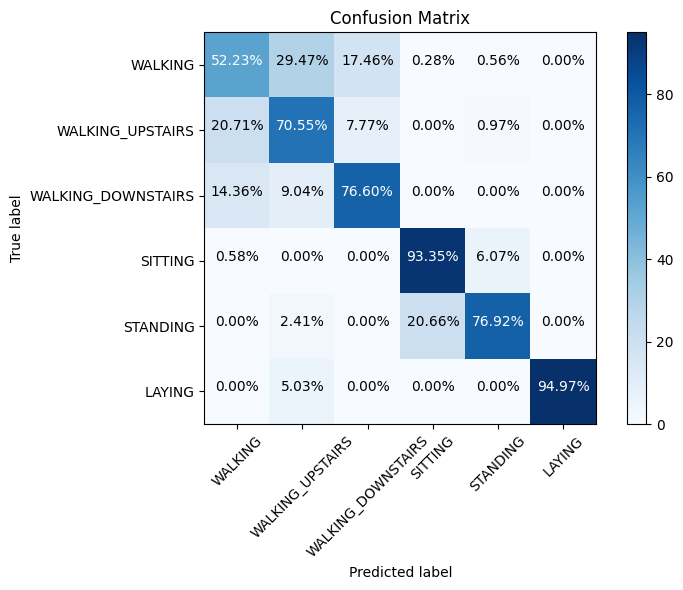

In [63]:
# Create the confusion matrix
cm = confusion_matrix(ada.predict(x_test), cat[y_pred])

# Convert the confusion matrix to percentages
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_percent, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=45)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm_percent.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        if cm_percent[i, j] != 0:
            plt.text(j, i, format(cm_percent[i, j], '.2f') + '%',
                    horizontalalignment="center",
                    color="white" if cm_percent[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()

## 2.3 Conclusiones

Comente con qué modelo obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

